# 1.Data Collection and Initial Analysis

In [6]:
# Importing essential libraries for data exploration and analysis.
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_excel(r"/Users/manutalla/Downloads/sydney_rain prediction.xlsx", header=0)

In [8]:
# Displaying Information About the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

### Observations About the Data:

* The dataset contains a total of 3337 entries.
* There are 17 columns in the dataset, each representing a different attribute.
* Several columns have missing values (e.g., MinTemp, MaxTemp, Rainfall).
* Missing value imputation is required to handle these null values and prepare the data for analysis and modeling.


# 2.Data Preprocessing

In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
# Impute missing values for numeric columns using appropriate strategies.
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace=True)
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   MinTemp           3337 non-null   float64       
 2   MaxTemp           3337 non-null   float64       
 3   Rainfall          3337 non-null   float64       
 4   Evaporation       3337 non-null   float64       
 5   Sunshine          3337 non-null   float64       
 6   Humidity9am       3337 non-null   float64       
 7   Humidity3pm       3337 non-null   float64       
 8   Pressure9am       3337 non-null   float64       
 9   Pressure3pm       3337 non-null   float64       
 10  Cloud9am          3337 non-null   float64       
 11  Cloud3pm          3337 non-null   float64       
 12  Temp9am           3337 non-null   float64       
 13  Temp3pm           3337 non-null   float64       
 14  RainToday_Yes     3337 n

## Outlier Treatment

In [12]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,3337,2012-10-16 01:24:34.737788672,2008-02-01 00:00:00,2010-05-15 00:00:00,2012-09-28 00:00:00,2015-03-14 00:00:00,2017-06-25 00:00:00,NaN
MinTemp,3337.0,14.865057,4.3,11.0,14.9,18.7,27.6,4.551593
MaxTemp,3337.0,23.002339,11.7,19.6,22.8,26.0,45.8,4.49329
Rainfall,3337.0,3.330231,0.0,0.0,0.0,1.4,119.4,9.88627
Evaporation,3337.0,5.18151,0.0,3.2,4.8,7.0,18.4,2.756505
Sunshine,3337.0,7.179374,0.0,4.3,8.2,10.2,13.6,3.801737
Humidity9am,3337.0,68.232245,19.0,58.0,69.0,80.0,100.0,15.053751
Humidity3pm,3337.0,54.704225,10.0,44.0,56.0,64.0,99.0,16.261954
Pressure9am,3337.0,1018.347678,986.7,1013.8,1018.6,1023.1,1039.0,7.000519
Pressure3pm,3337.0,1016.020375,989.8,1011.3,1016.3,1020.8,1036.7,7.012189


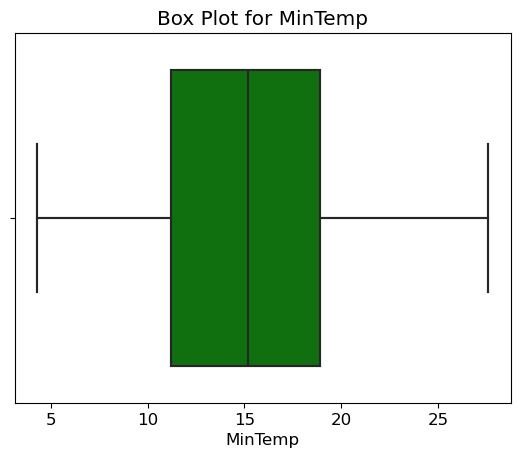

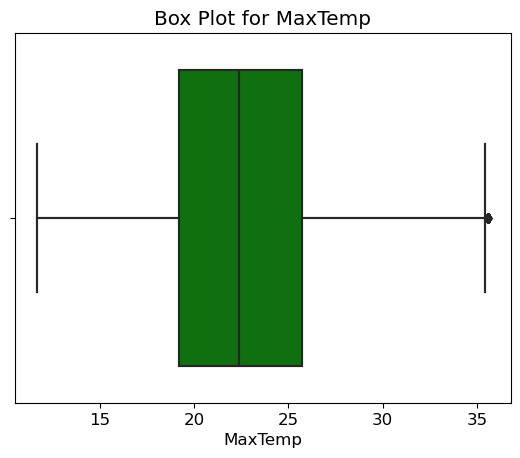

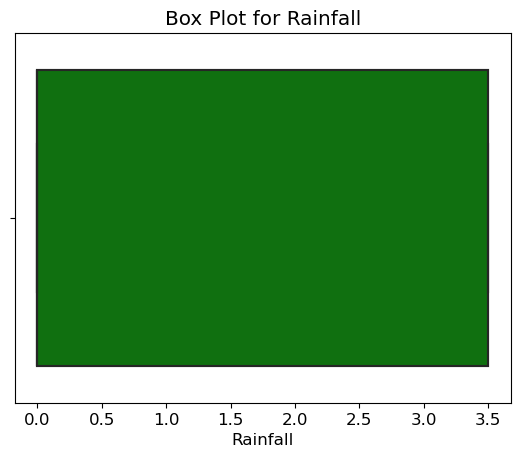

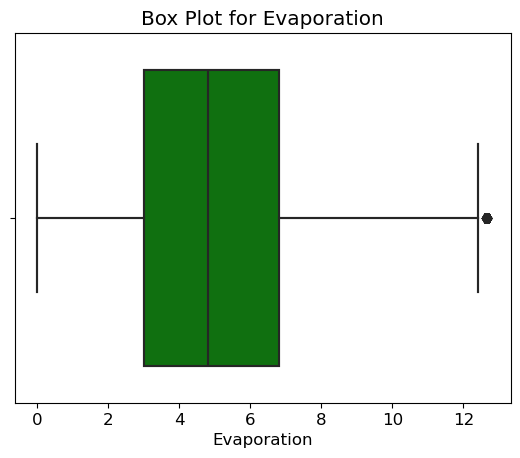

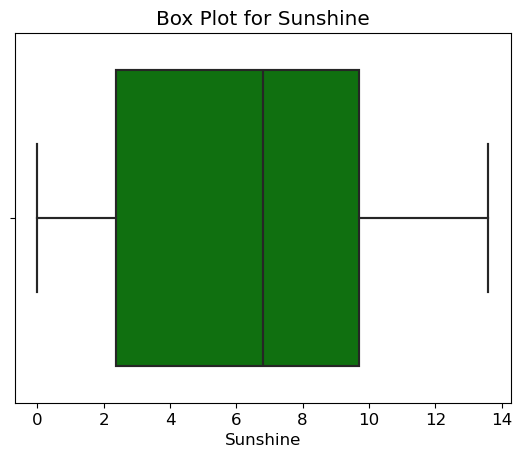

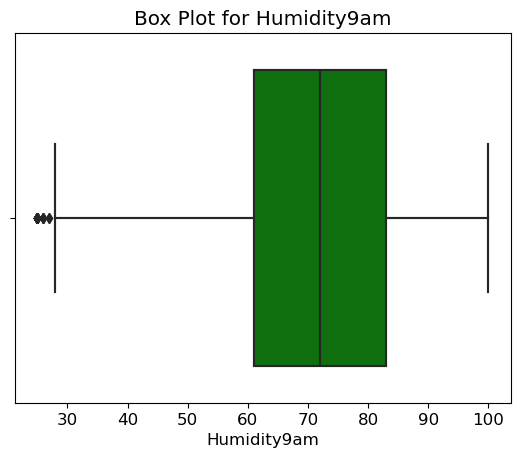

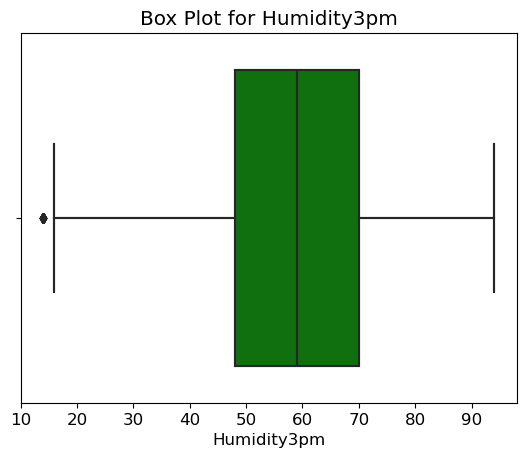

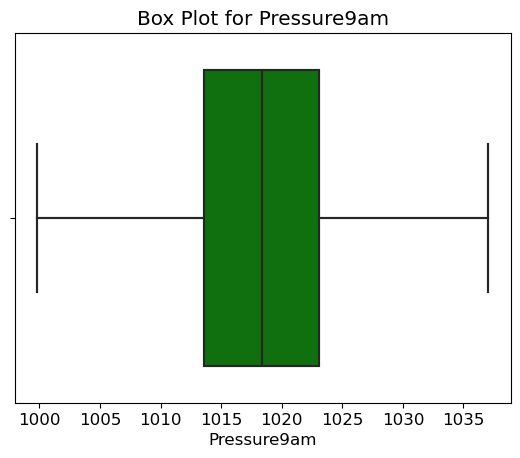

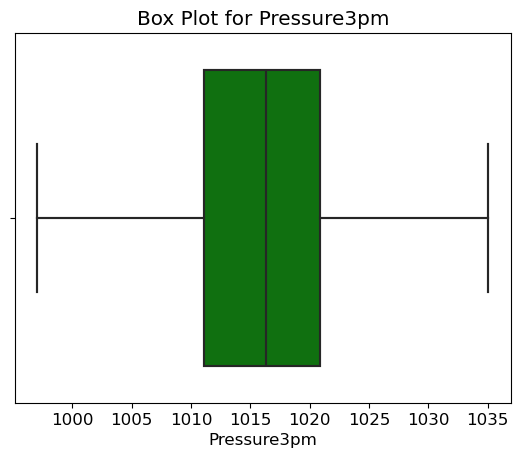

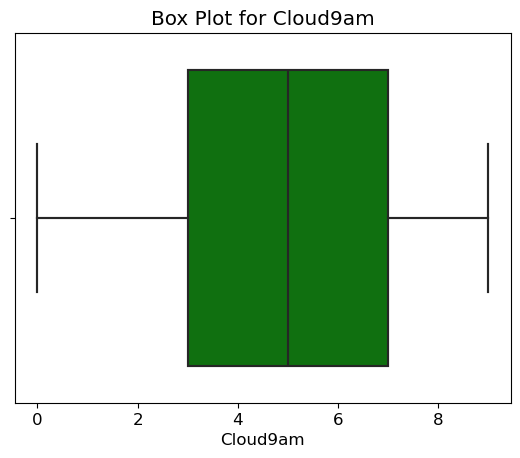

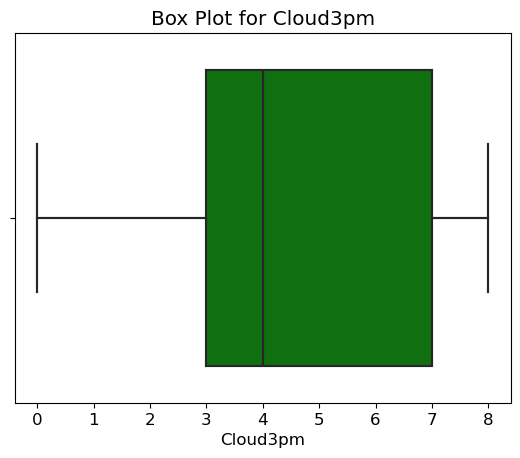

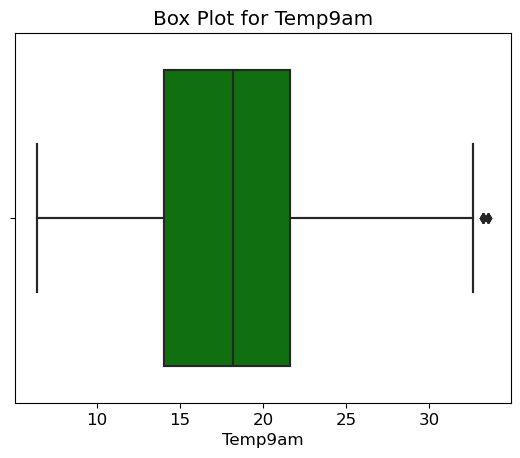

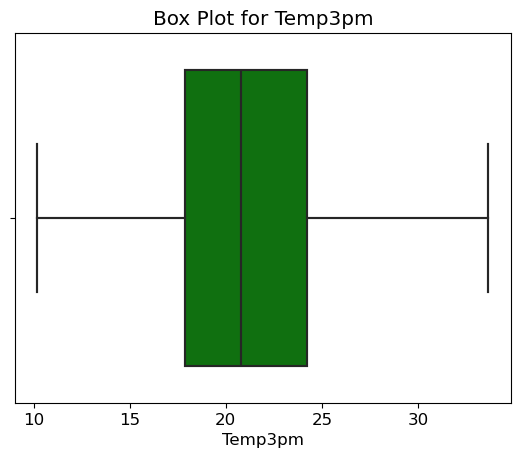

In [113]:
# List of numerical columns for which we want to create box plots
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                     'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

for feature in numerical_columns:
    # Create a new figure with a specified size
    data = df.copy()
    sns.boxplot(data=data, x=feature)
    plt.title(f'Box Plot for {feature}')
    # Create a box plot for the current feature 
    sns.boxplot(data=data, x=feature, color='green')
    plt.show()

In [15]:
# Calculate the Interquartile Range (IQR) for the MaxTemp column.
IQR = df['MaxTemp'].quantile(0.75) - df['MaxTemp'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['MaxTemp'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['MaxTemp'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)
df.loc[df['MaxTemp'] >= 35.5999, 'MaxTemp'] = 35.5999
df.loc[df['MaxTemp'] <= 10, 'MaxTemp'] = 10


Lower Limit for Potential Outliers: 10.000000000000004
Upper Limit for Potential Outliers: 35.599999999999994


In [16]:
# Calculate the Interquartile Range (IQR) for the Rainfall column.
IQR = df['Rainfall'].quantile(0.75) - df['Rainfall'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Rainfall'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Rainfall'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)
df.loc[df['Rainfall'] >= 3.4999, 'Rainfall'] = 3.4999
df.loc[df['Rainfall'] <= -2.099, 'Rainfall'] = -2.099


Lower Limit for Potential Outliers: -2.0999999999999996
Upper Limit for Potential Outliers: 3.4999999999999996


In [17]:
# Calculate the Interquartile Range (IQR) for the Evaporation column.
IQR = df['Evaporation'].quantile(0.75) - df['Evaporation'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Evaporation'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Evaporation'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)
df.loc[df['Evaporation'] >= 12.7, 'Evaporation'] = 12.7
df.loc[df['Evaporation'] <= -2.4999, 'Evaporation'] = -2.499


Lower Limit for Potential Outliers: -2.499999999999999
Upper Limit for Potential Outliers: 12.7


In [18]:
# Calculate the Interquartile Range (IQR) for the Humidity9am column.
IQR = df['Humidity9am'].quantile(0.75) - df['Humidity9am'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Humidity9am'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Humidity9am'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)
df.loc[df['Humidity9am'] >= 113, 'Humidity9am'] = 113
df.loc[df['Humidity9am'] <= 25, 'Humidity9am'] = 25


Lower Limit for Potential Outliers: 25.0
Upper Limit for Potential Outliers: 113.0


In [19]:
# Calculate the Interquartile Range (IQR) for the Humidity3pm column.
IQR = df['Humidity3pm'].quantile(0.75) - df['Humidity3pm'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Humidity3pm'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Humidity3pm'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)
df.loc[df['Humidity3pm'] >= 94, 'Humidity3pm'] = 94
df.loc[df['Humidity3pm'] <= 14, 'Humidity3pm'] = 14


Lower Limit for Potential Outliers: 14.0
Upper Limit for Potential Outliers: 94.0


In [20]:
# Calculate the Interquartile Range (IQR) for the Pressure9am column.
IQR = df['Pressure9am'].quantile(0.75) - df['Pressure9am'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Pressure9am'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Pressure9am'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)
df.loc[df['Pressure9am'] >= 1037.05, 'Pressure9am'] = 1037.05
df.loc[df['Pressure9am'] <= 999.84, 'Pressure9am'] = 999.84


Lower Limit for Potential Outliers: 999.8499999999999
Upper Limit for Potential Outliers: 1037.0500000000002


In [21]:
# Calculate the Interquartile Range (IQR) for the Pressure3pm column.
IQR = df['Pressure3pm'].quantile(0.75) - df['Pressure3pm'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Pressure3pm'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Pressure3pm'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)
df.loc[df['Pressure3pm'] >= 1035.05, 'Pressure3pm'] = 1035.05
df.loc[df['Pressure3pm'] <= 997.05, 'Pressure3pm'] = 997.05


Lower Limit for Potential Outliers: 997.05
Upper Limit for Potential Outliers: 1035.05


In [22]:
# Calculate the Interquartile Range (IQR) for the Temp9am column.
IQR = df['Temp9am'].quantile(0.75) - df['Temp9am'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Temp9am'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Temp9am'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)
df.loc[df['Temp9am'] >= 33.55, 'Temp9am'] = 33.55
df.loc[df['Temp9am'] <= 1.95, 'Temp9am'] = 1.95



Lower Limit for Potential Outliers: 1.9500000000000028
Upper Limit for Potential Outliers: 33.55


In [23]:
# Calculate the Interquartile Range (IQR) for the Temp3pm column.
IQR = df['Temp3pm'].quantile(0.75) - df['Temp3pm'].quantile(0.25)

# Calculate the lower and upper bounds to identify potential outliers.
lower_limit = df['Temp3pm'].quantile(0.25) - (IQR * 1.5)
upper_limit = df['Temp3pm'].quantile(0.75) + (IQR * 1.5)

# Print the lower and upper bounds for potential outliers.
print("Lower Limit for Potential Outliers:", lower_limit)
print("Upper Limit for Potential Outliers:", upper_limit)
df.loc[df['Temp3pm'] >= 33.65, 'Temp3pm'] = 33.65
df.loc[df['Temp3pm'] <= 9.249, 'Temp3pm'] = 9.249

Lower Limit for Potential Outliers: 9.249999999999996
Upper Limit for Potential Outliers: 33.650000000000006


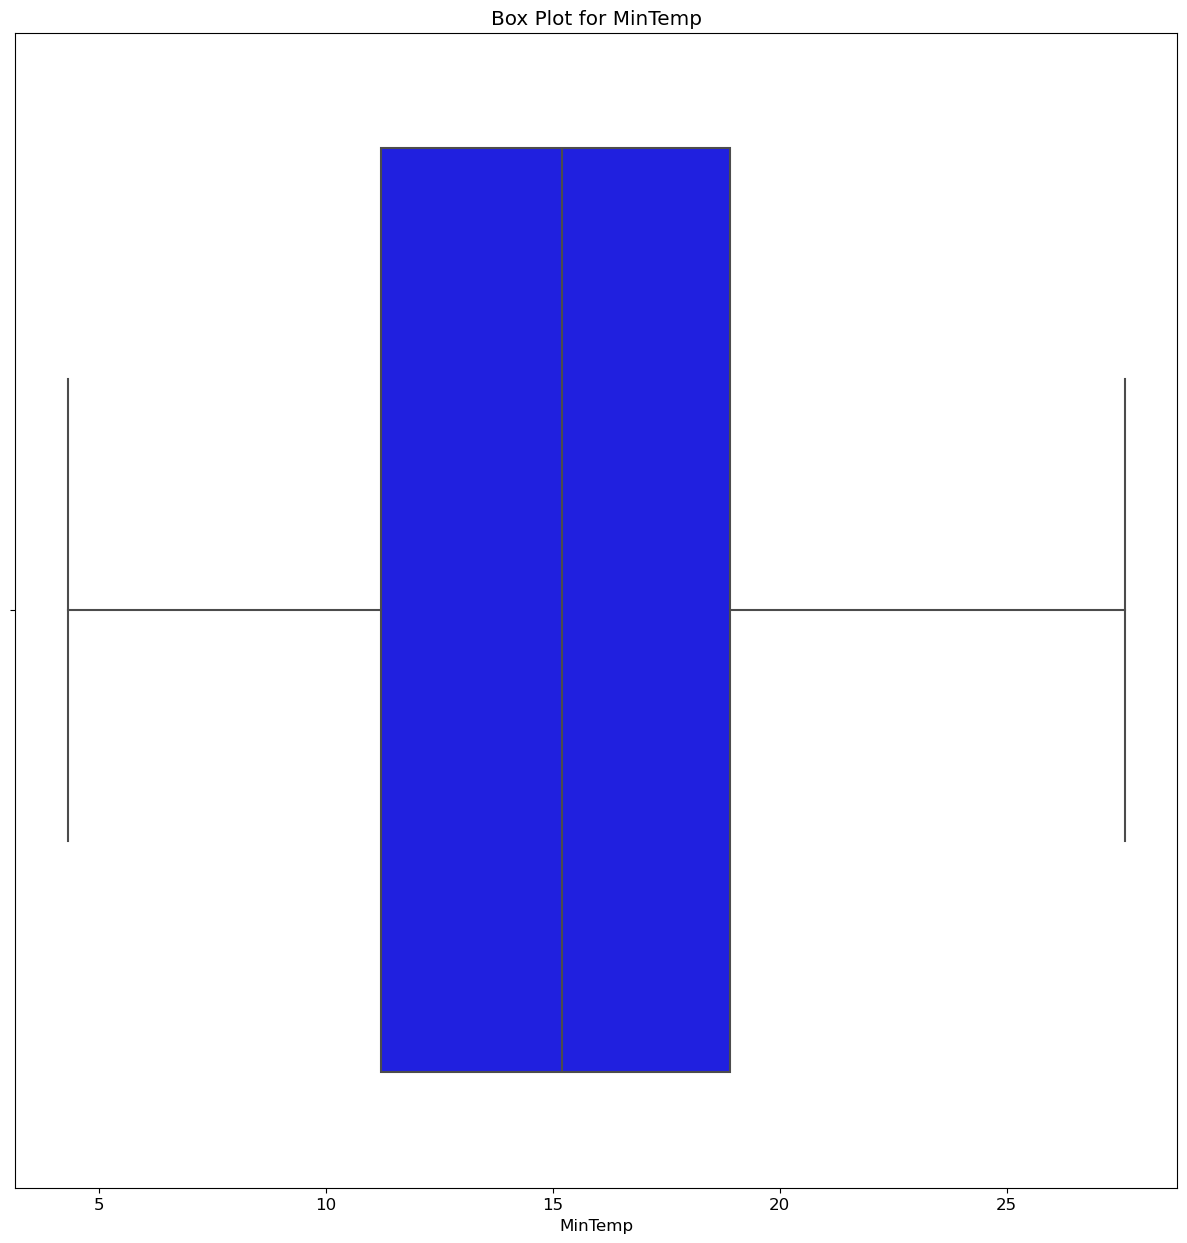

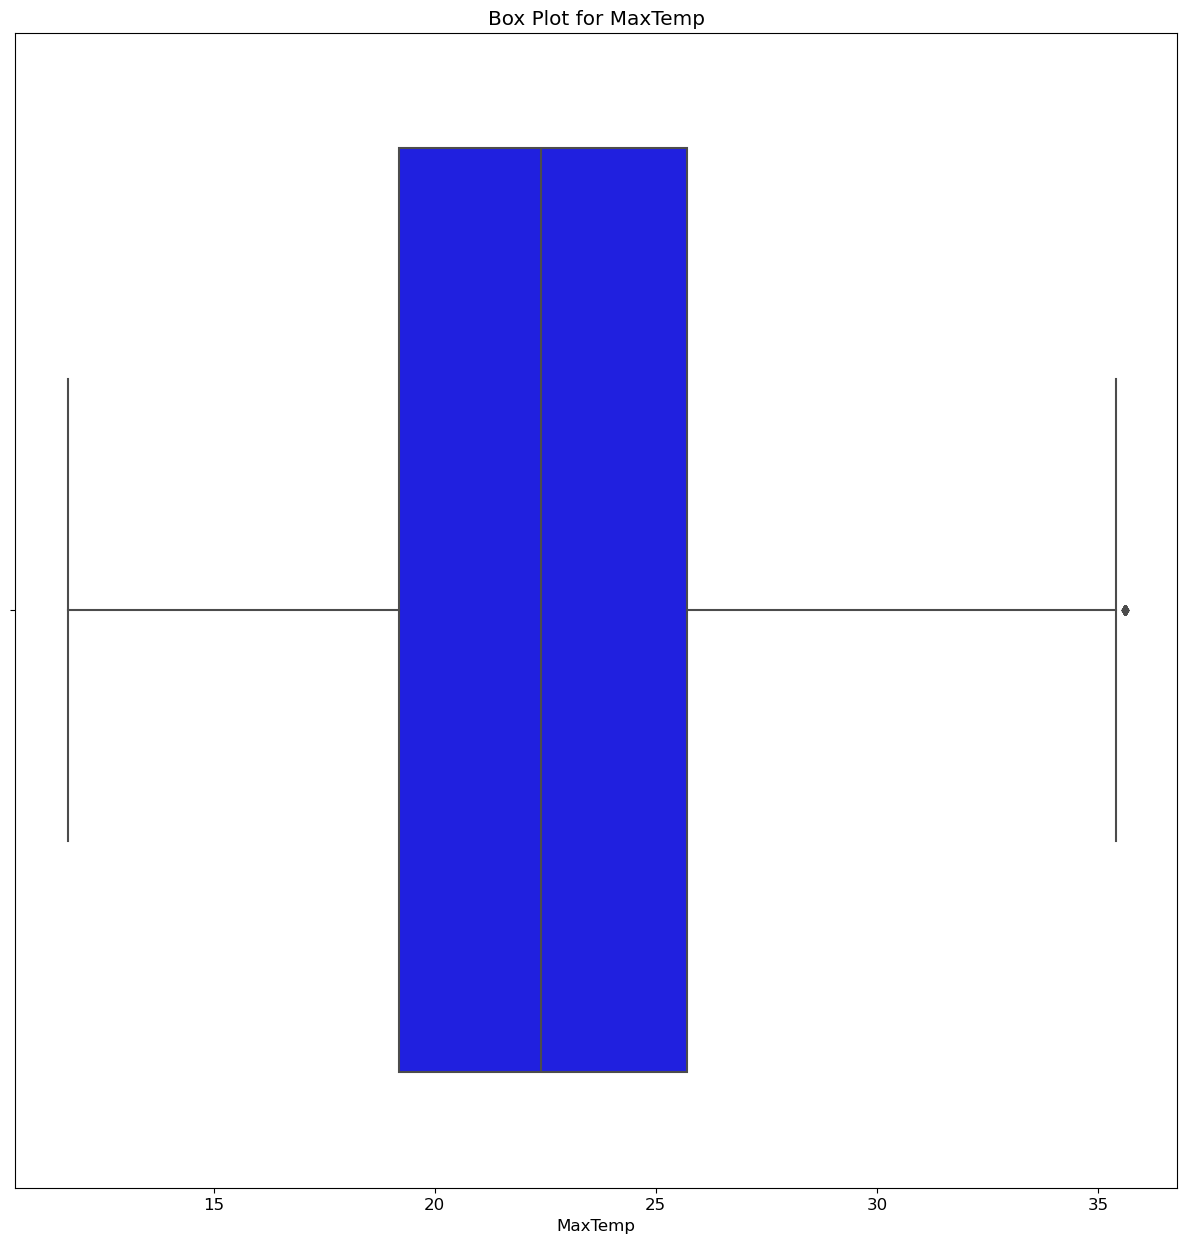

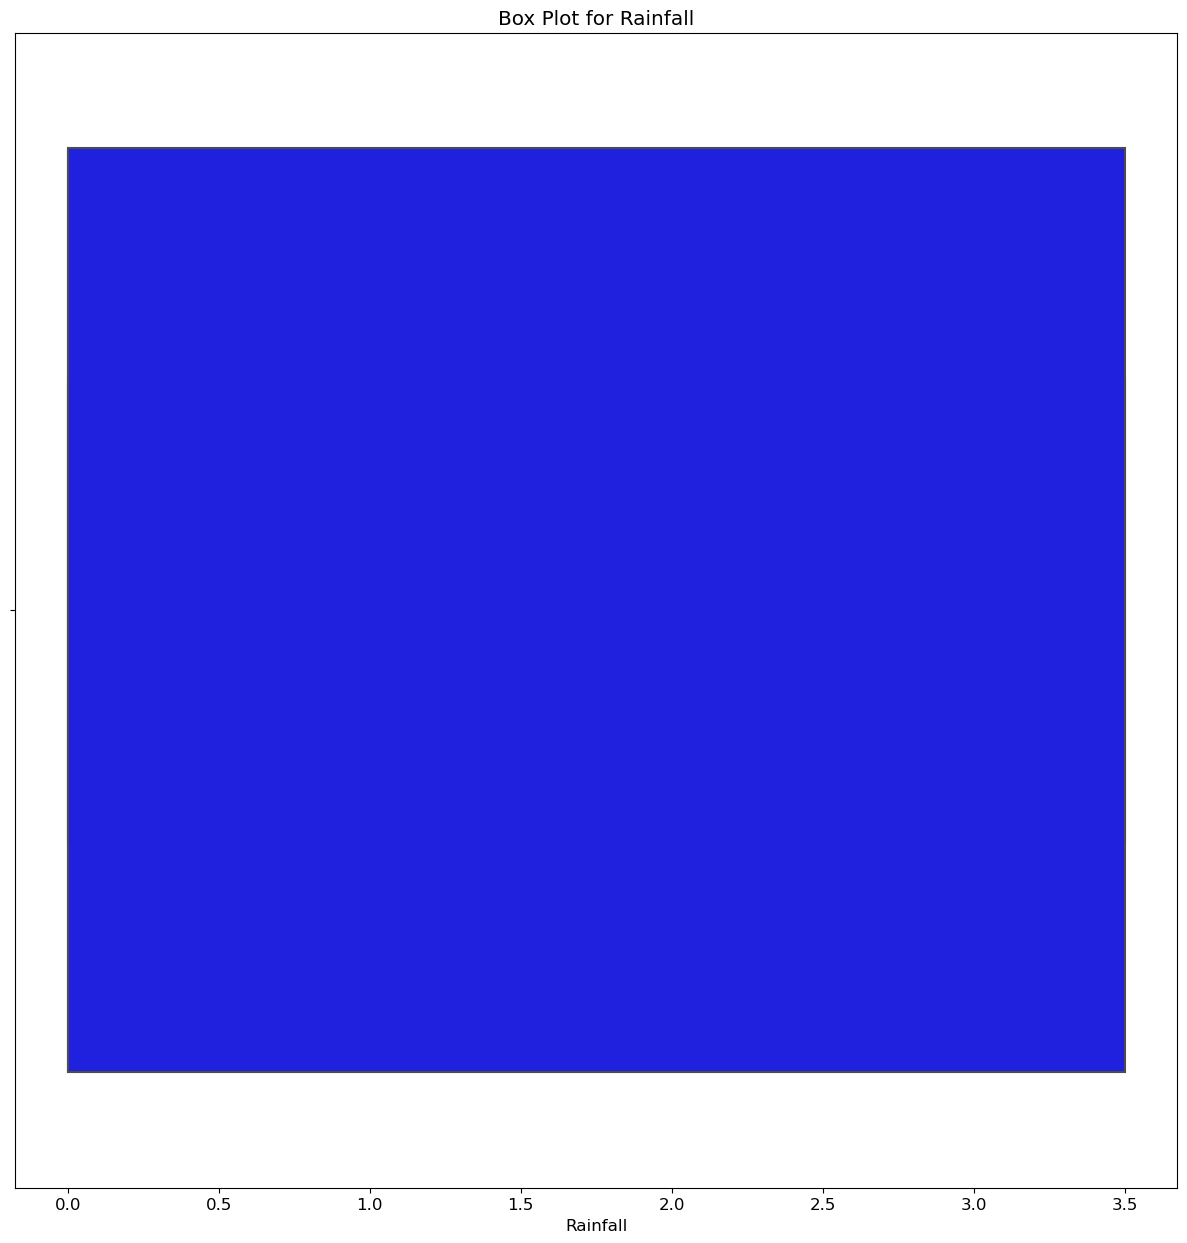

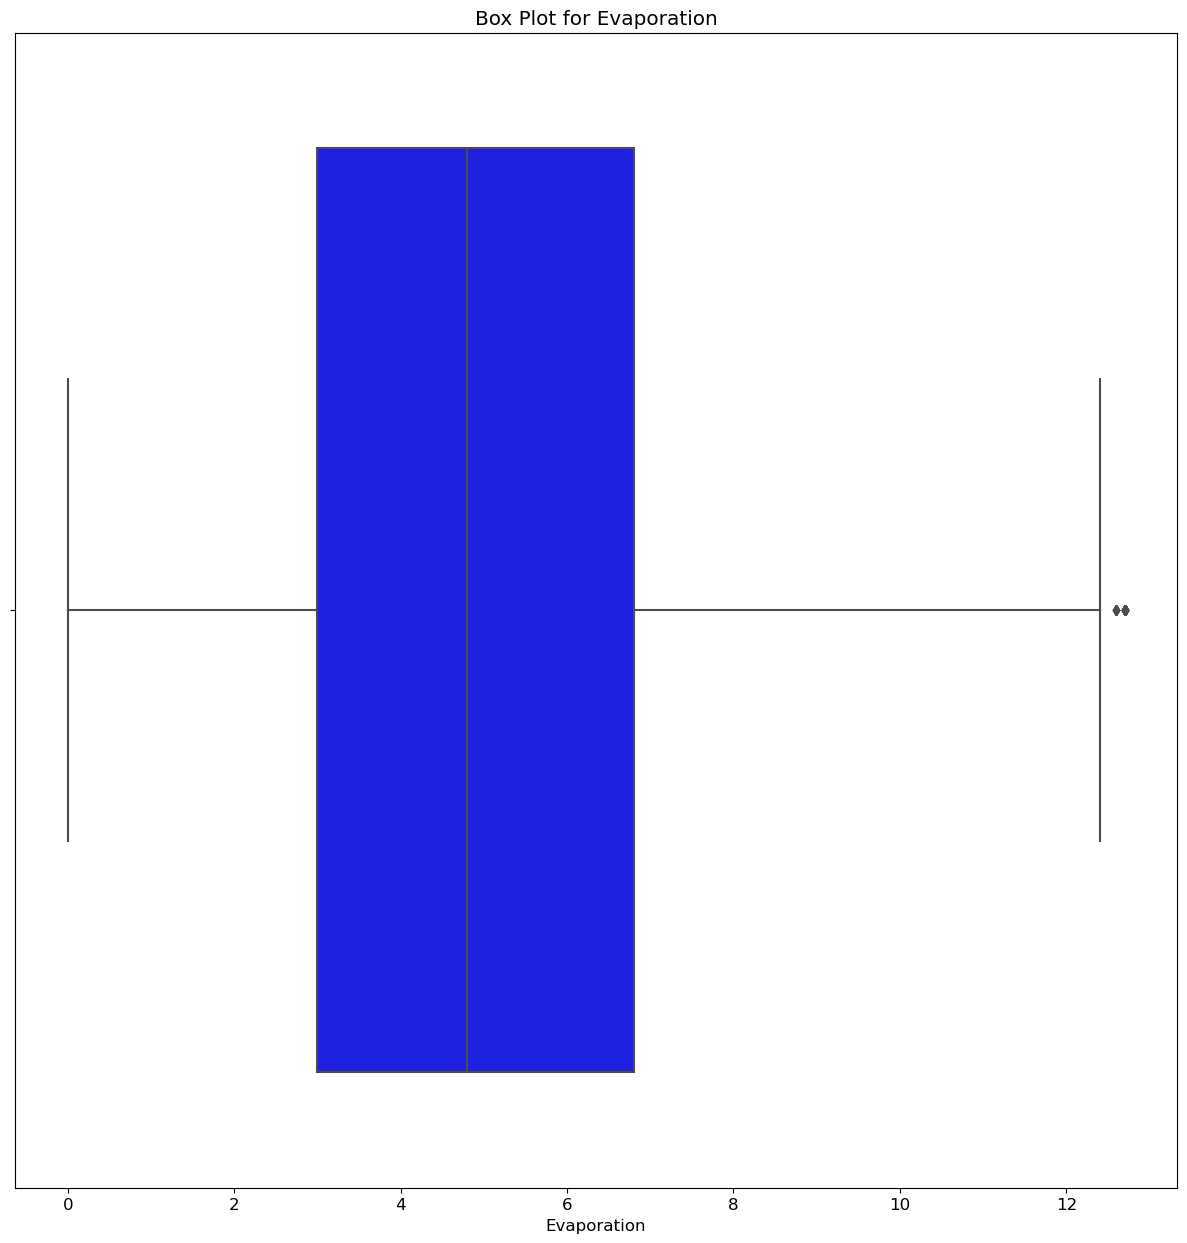

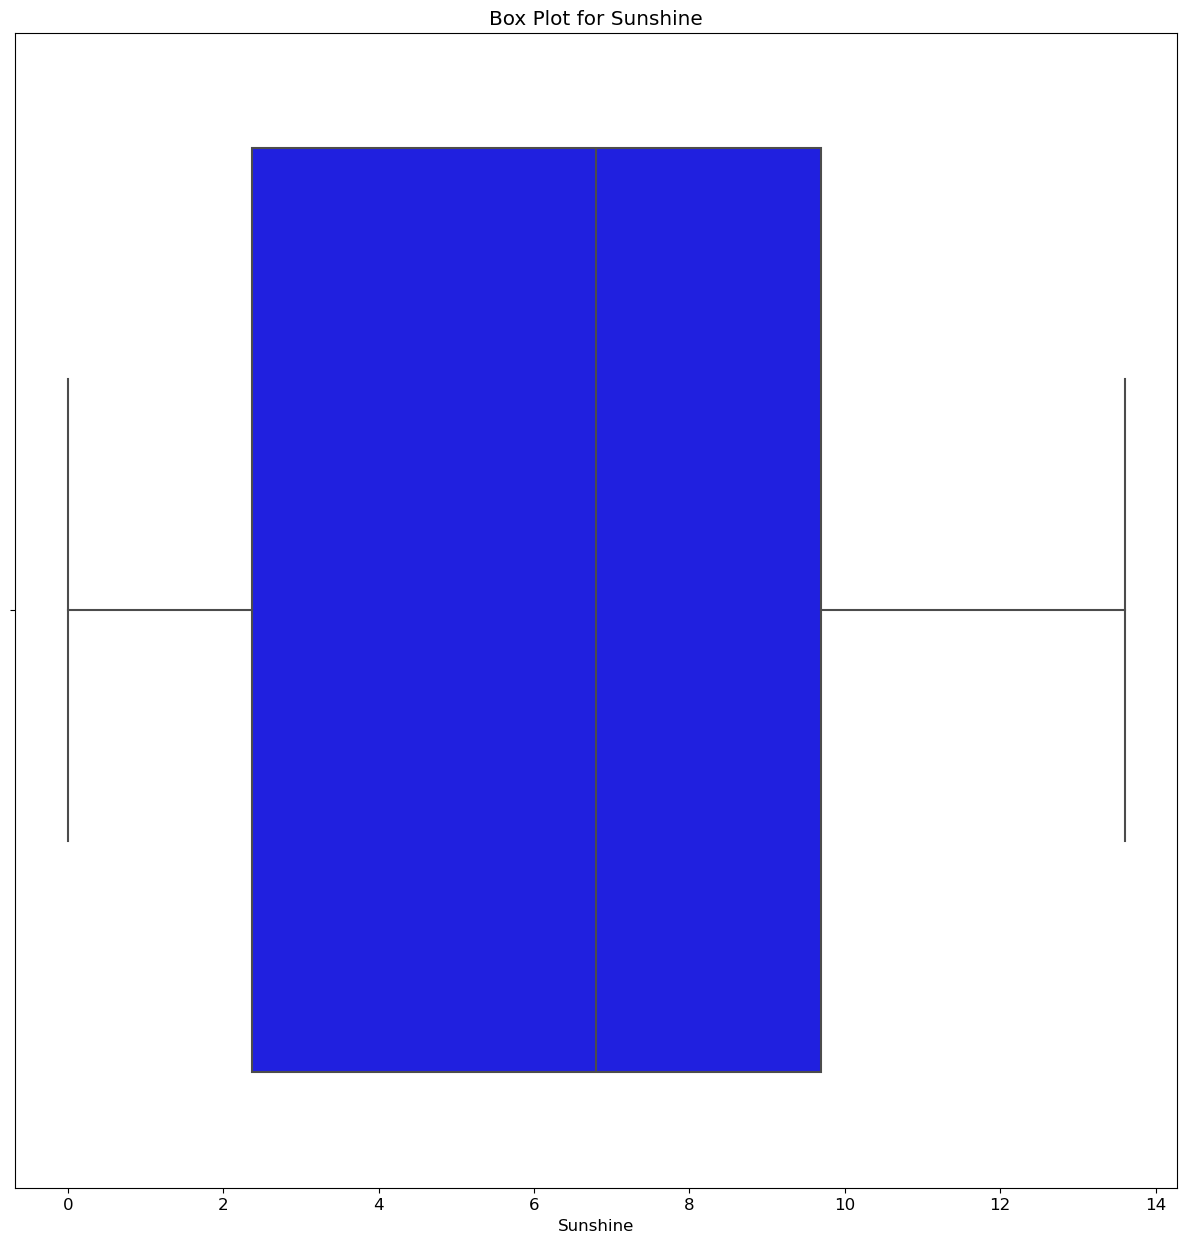

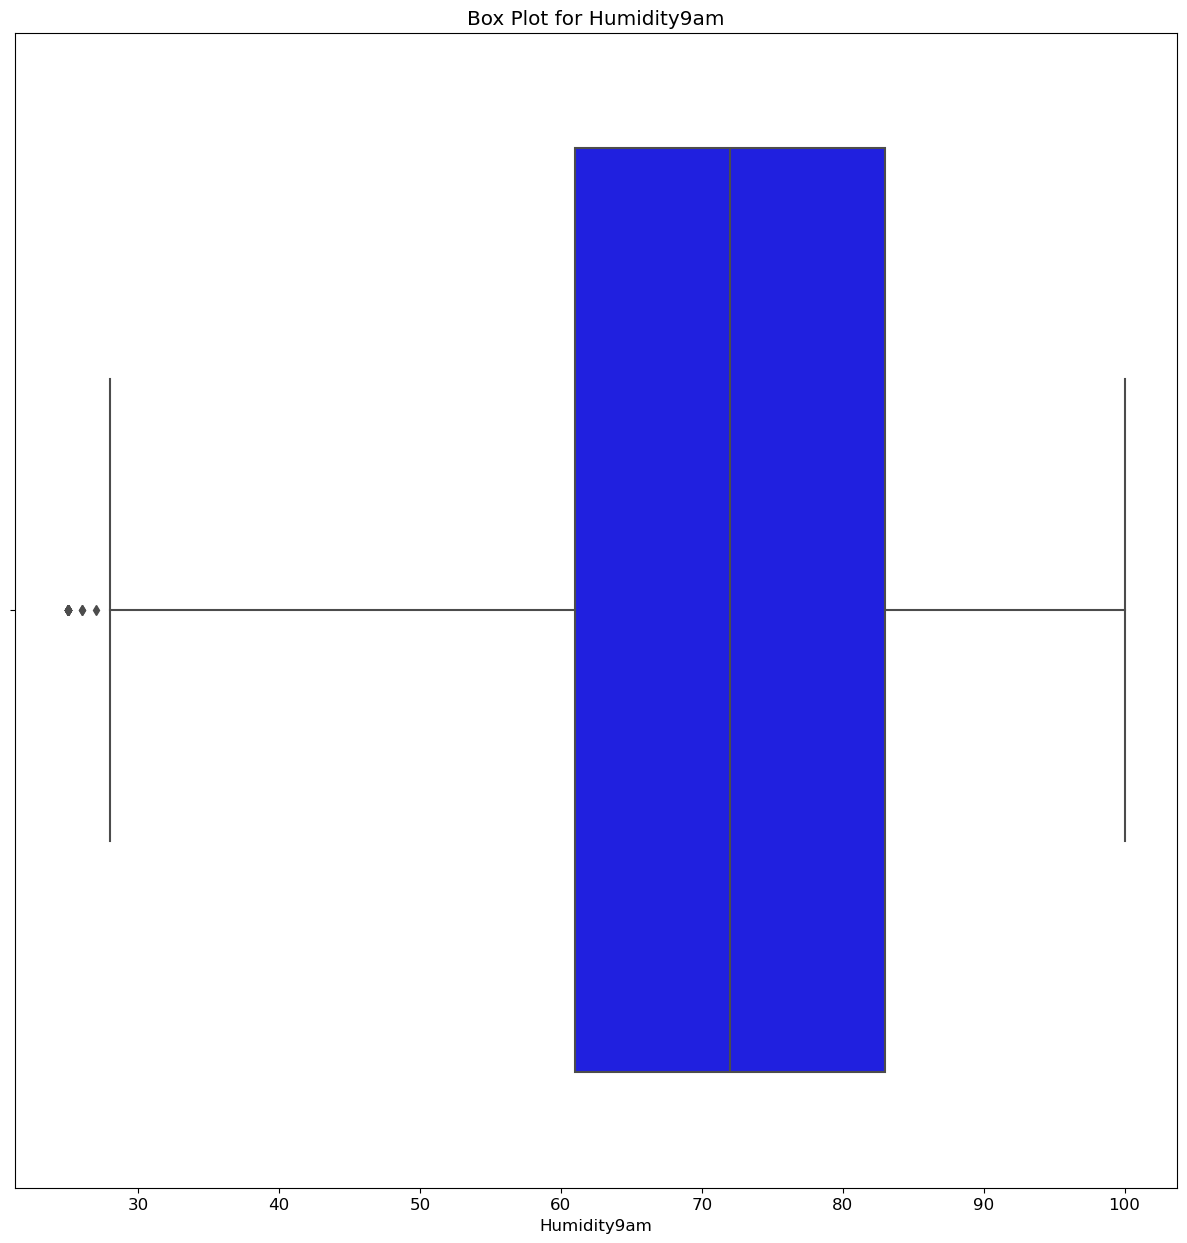

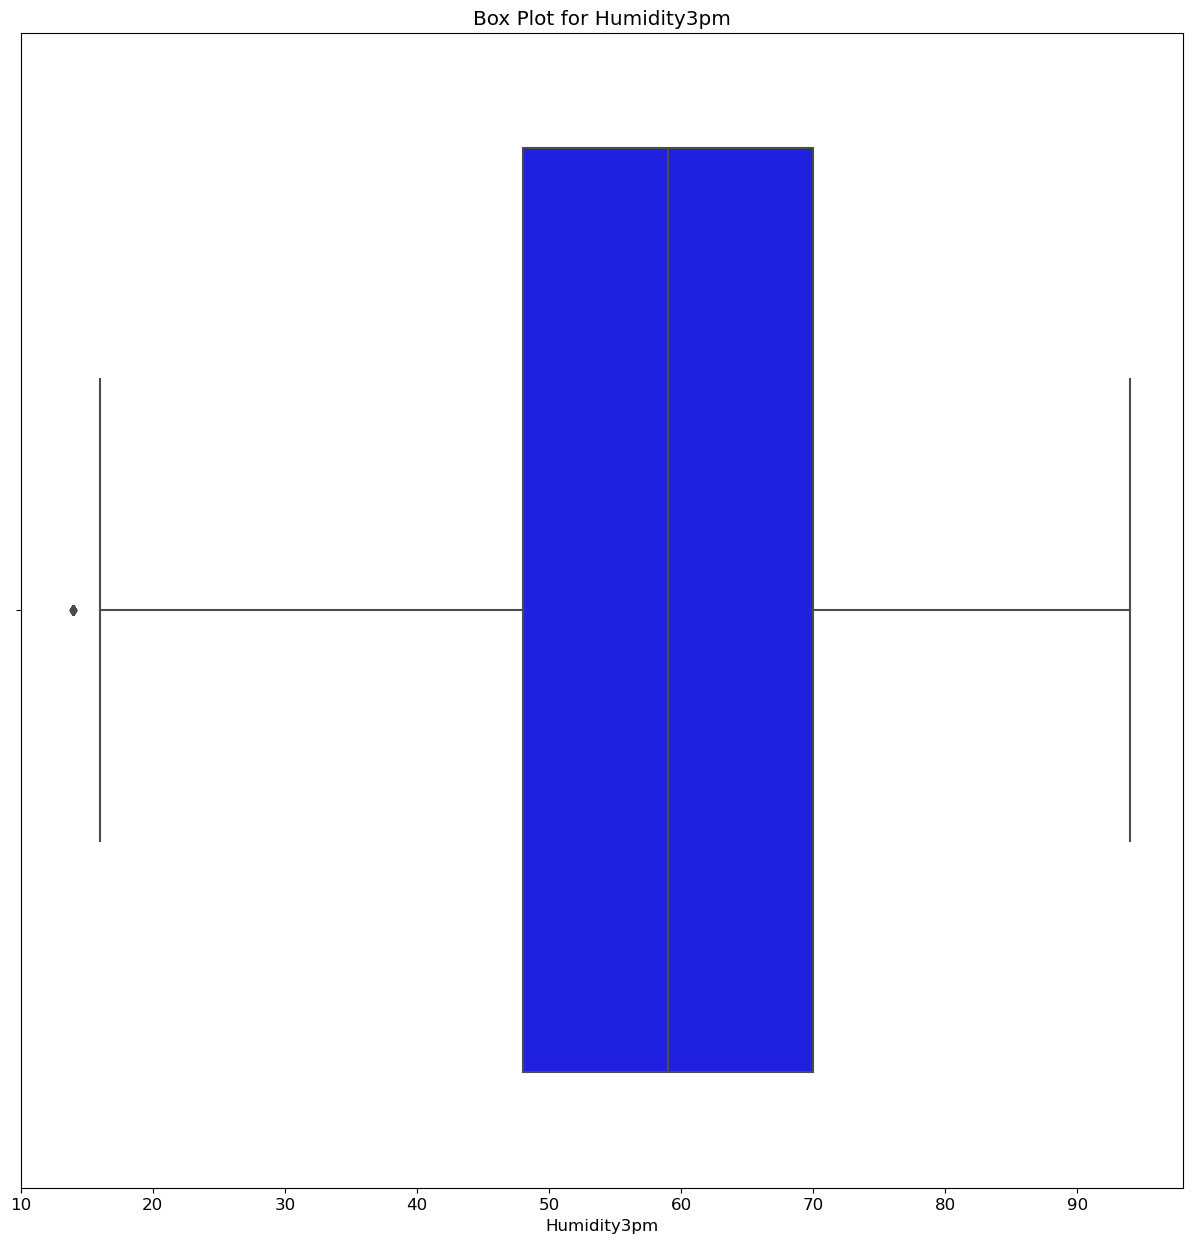

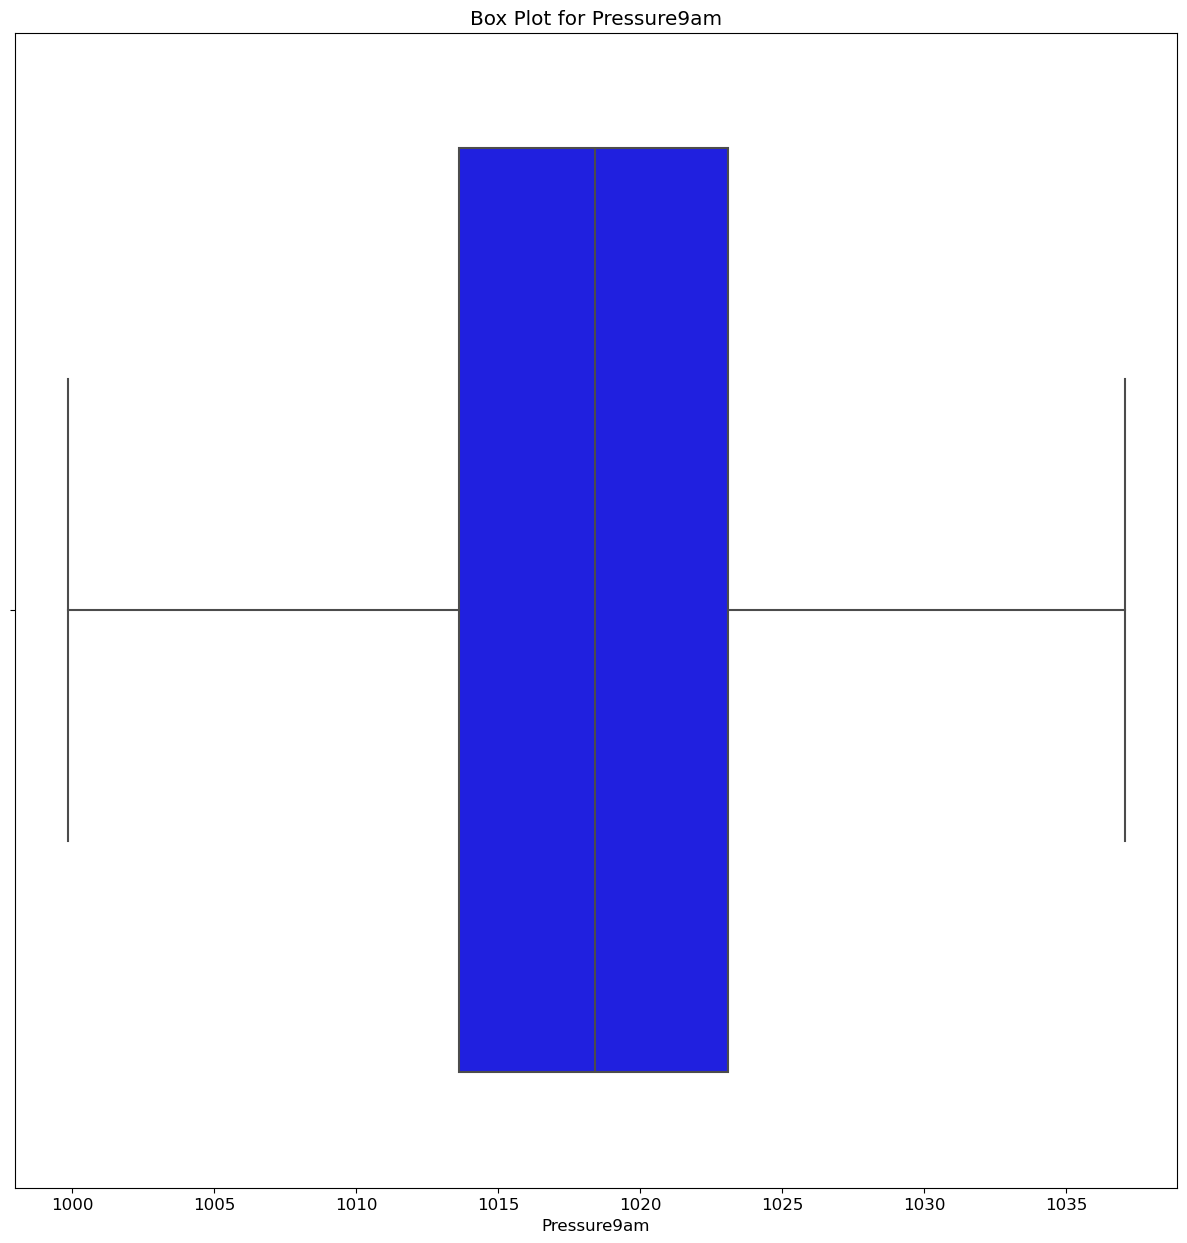

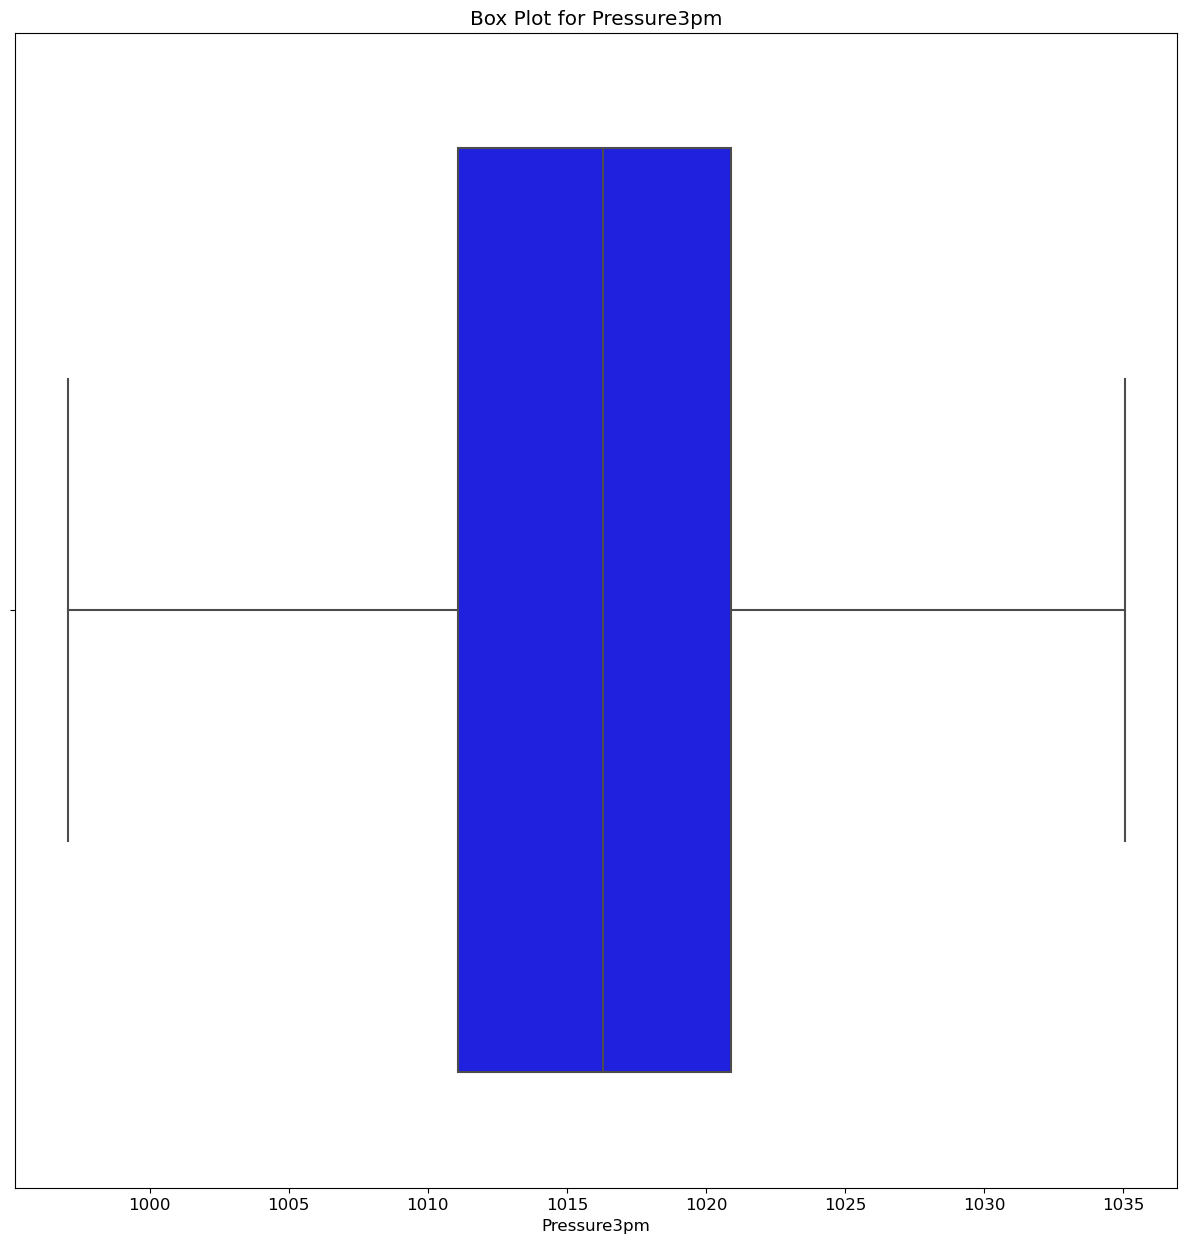

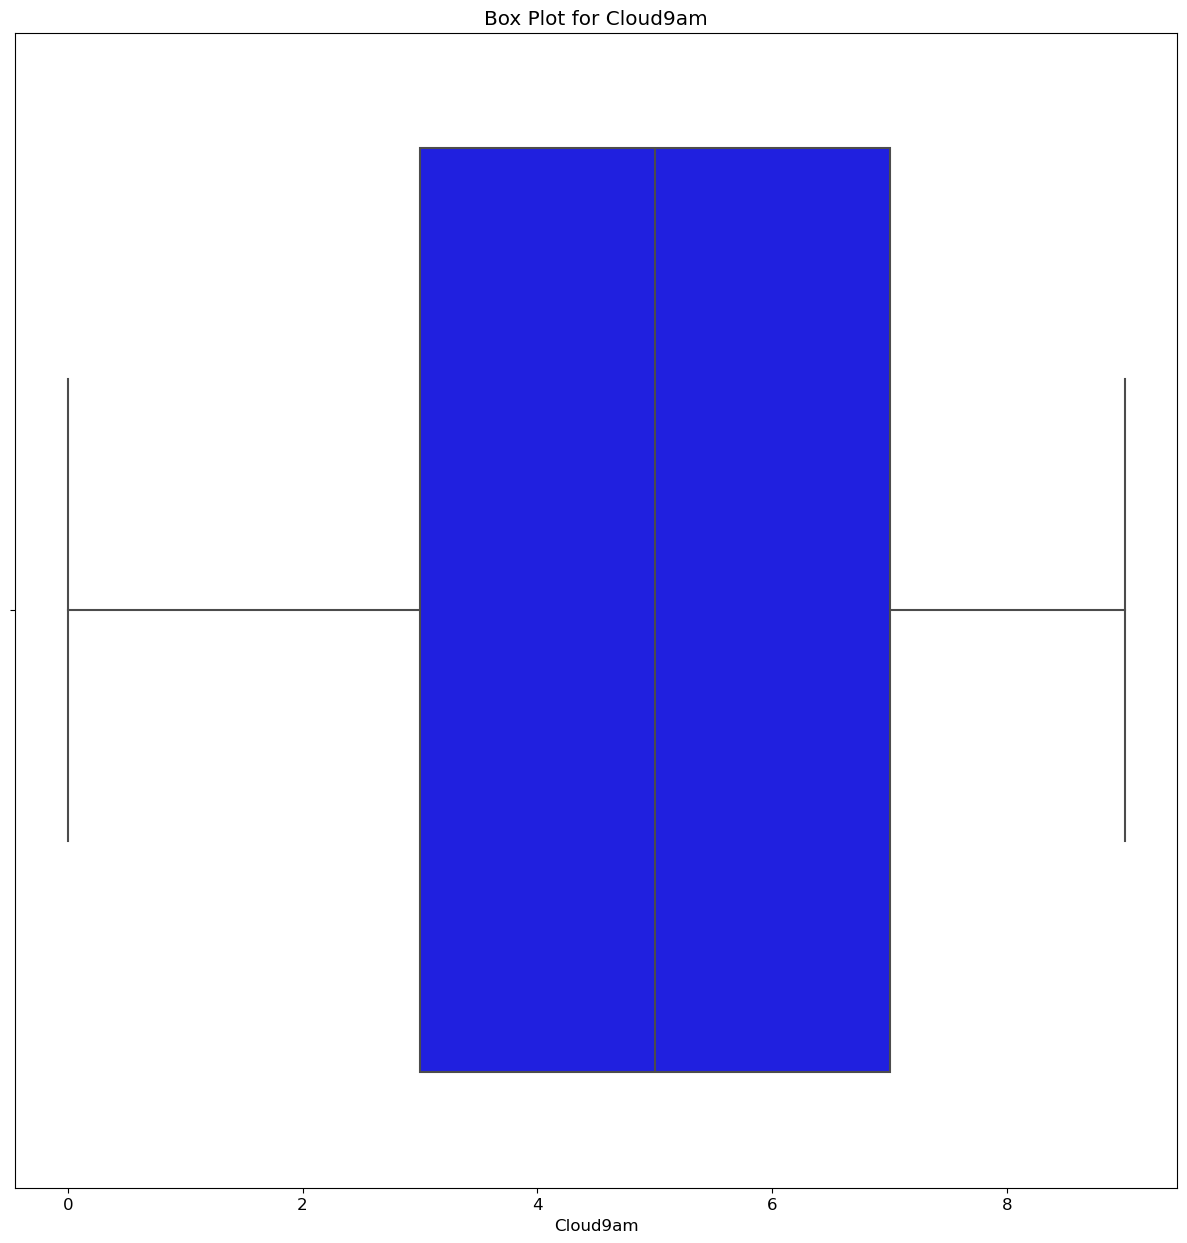

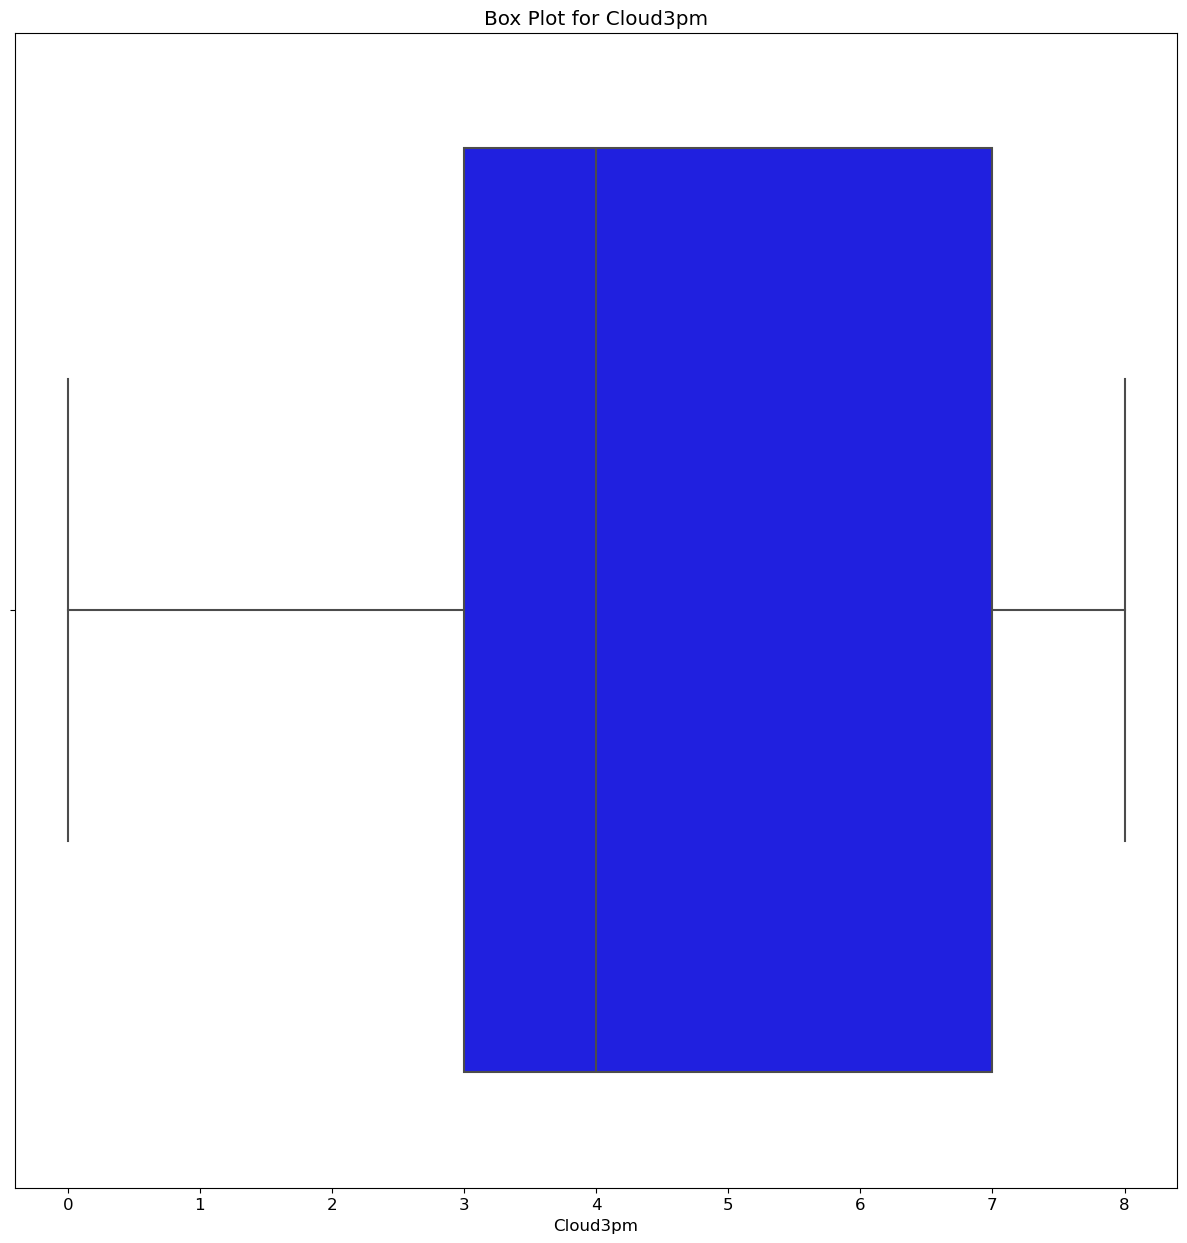

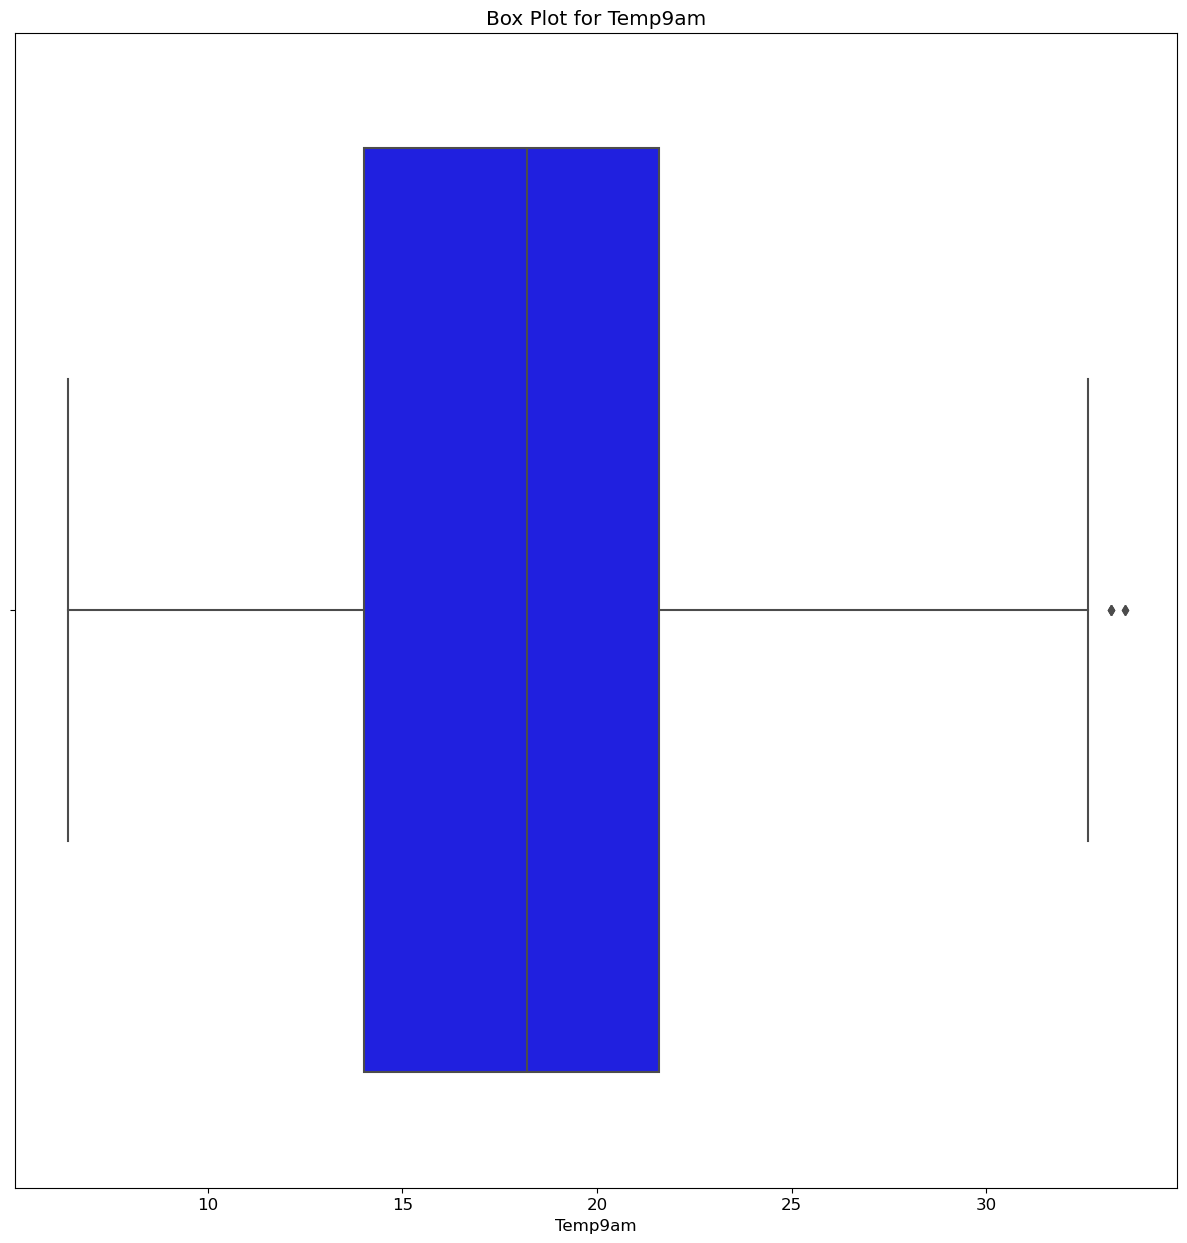

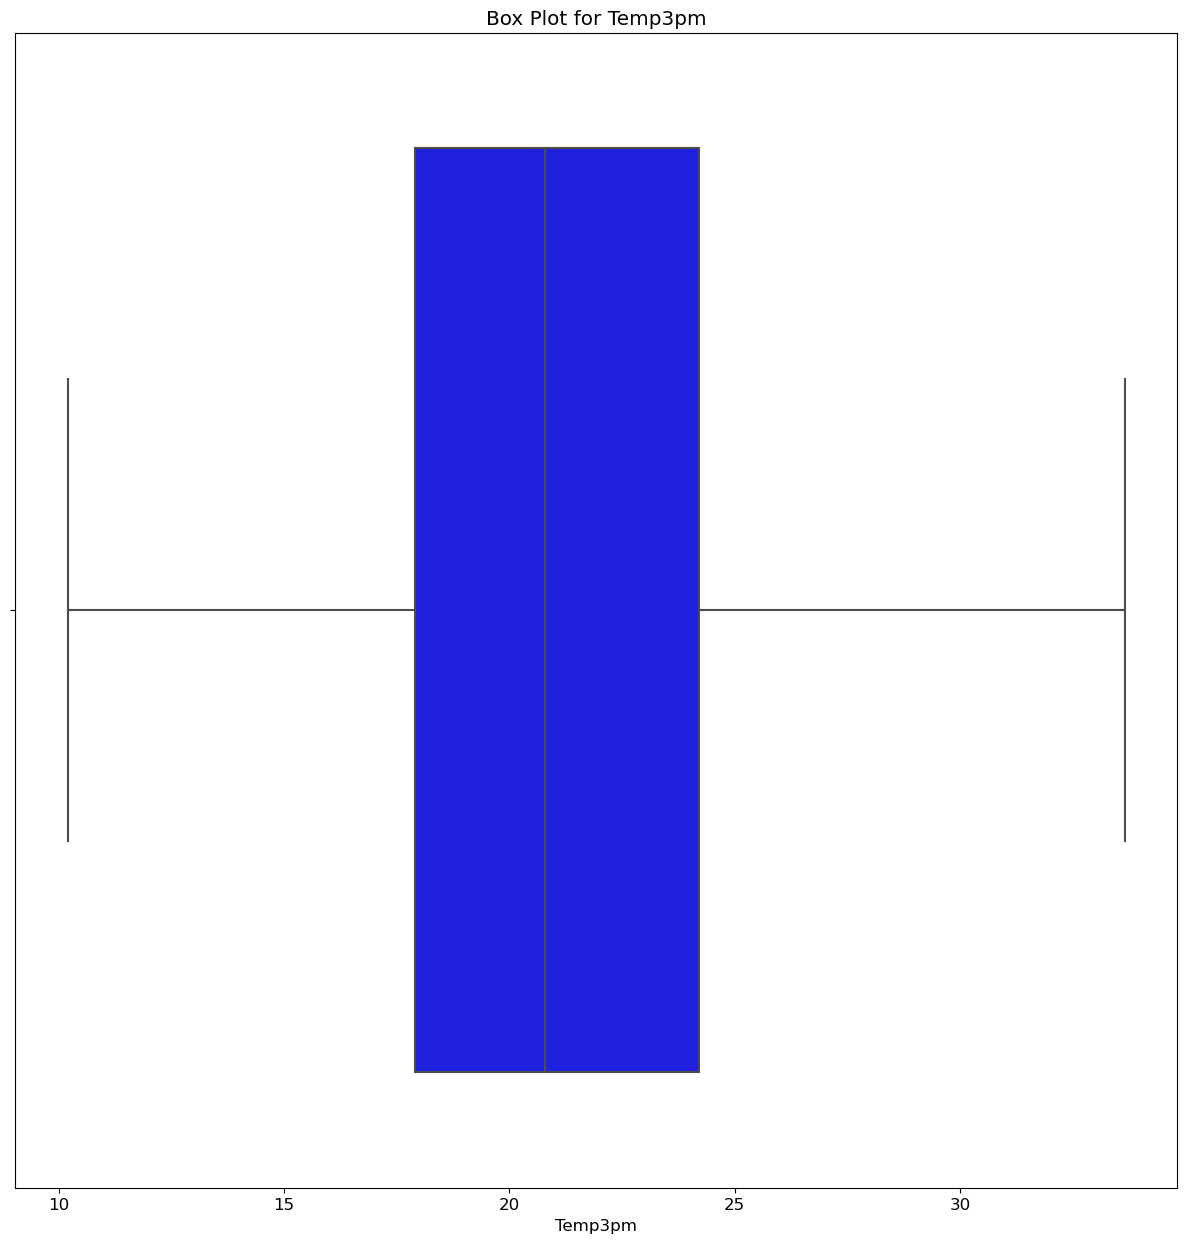

In [114]:

for feature in numerical_columns:
    plt.figure(figsize=(15, 15))
    data = df.copy()
    sns.boxplot(data=data, x=feature, color='blue')
    plt.title(f'Box Plot for {feature}')
    plt.show()


## Data Visualisation

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

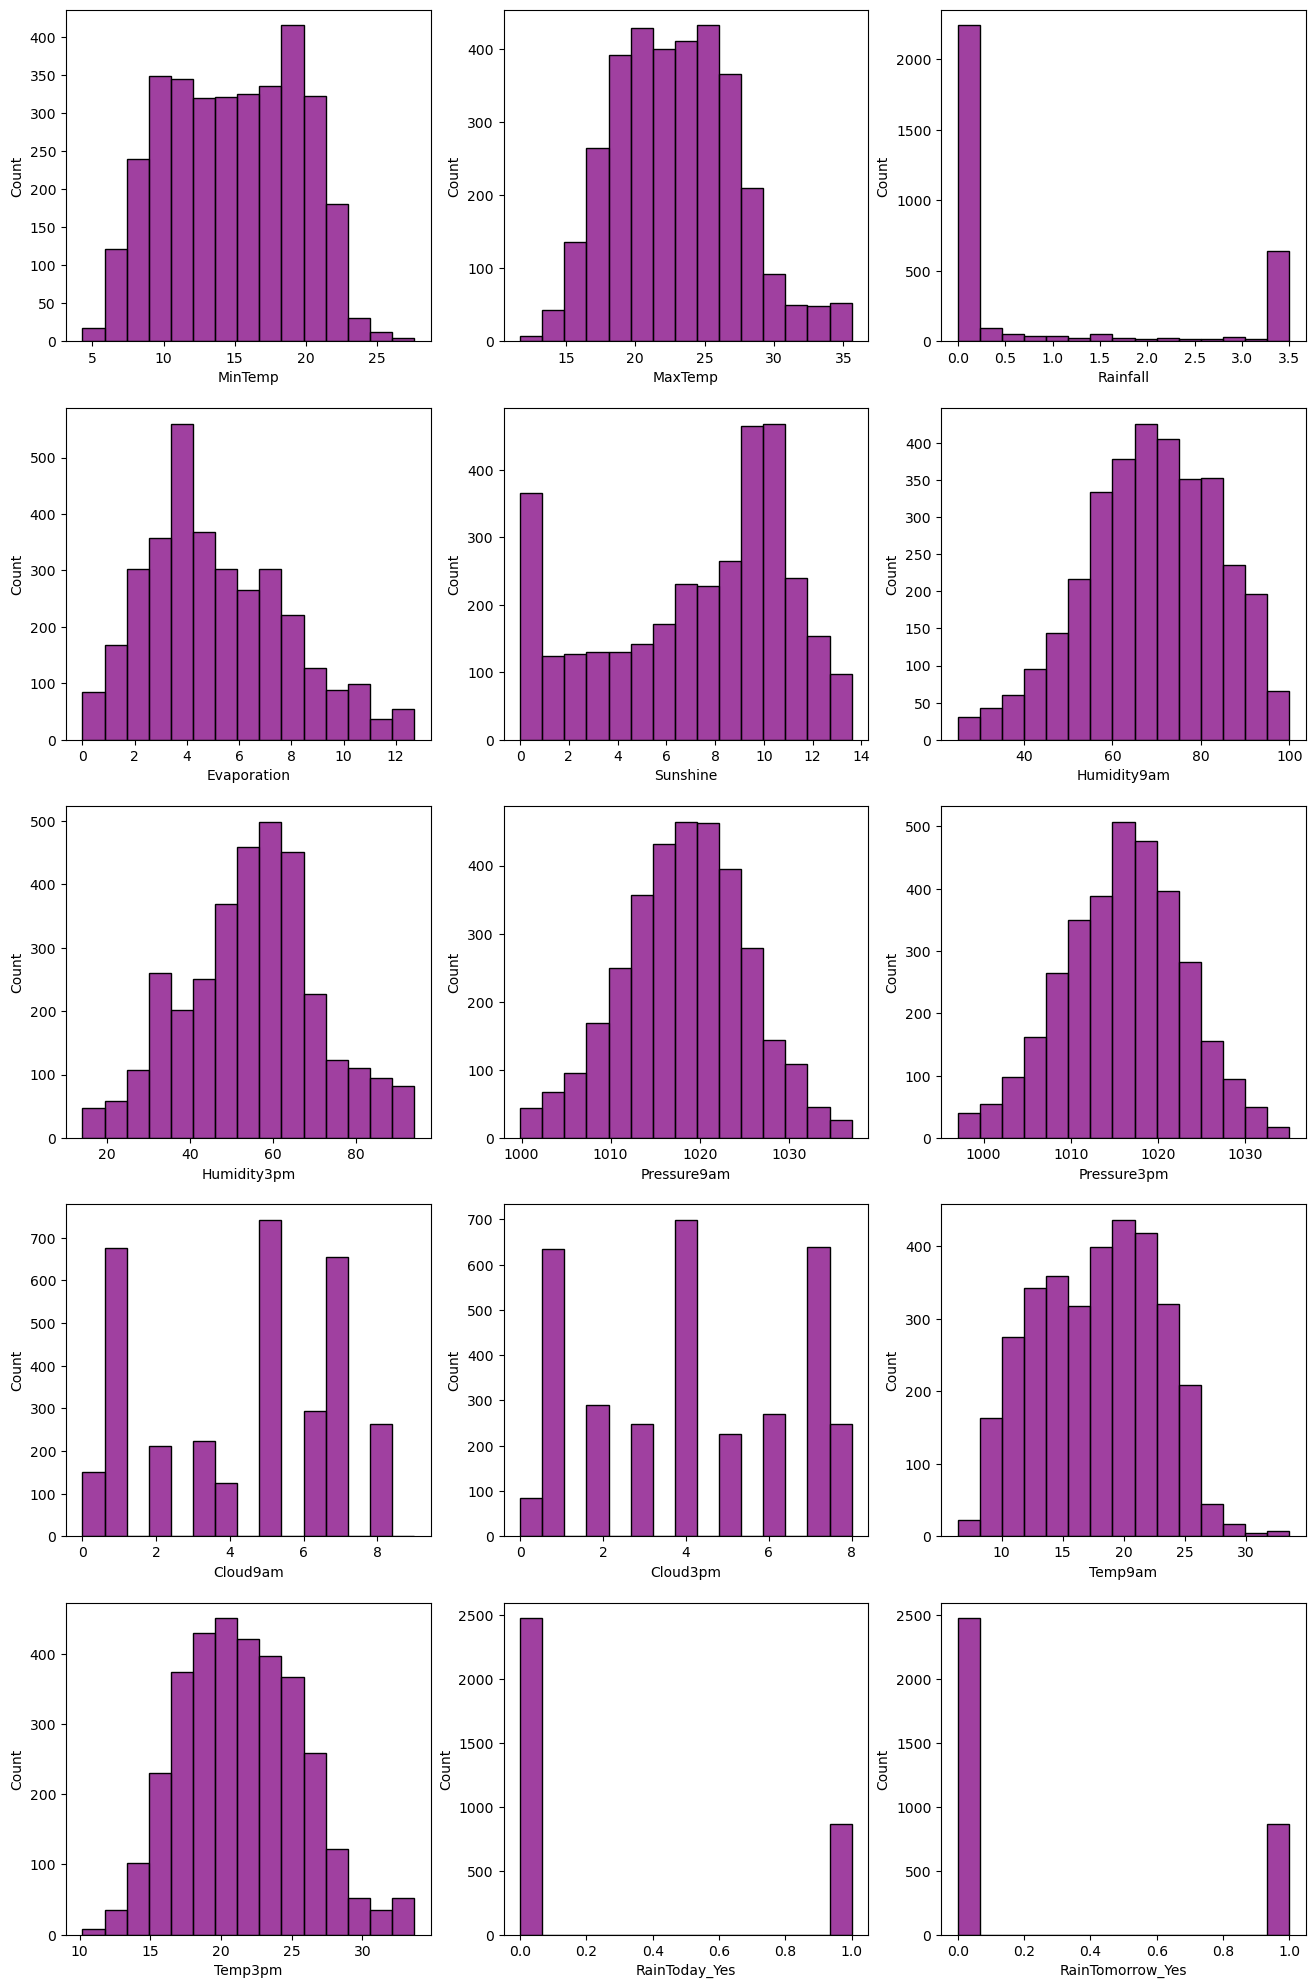

In [26]:
# Set the number of rows and columns for the subplot grid
n_rows = 5
n_cols = 3

# Create the subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

# Set the size of the figure
fig.set_size_inches((16, 25))

# Select the columns from the original DataFrame to plot (columns 1 to 14)
# Consider only columns that are useful for evaluation
selected_columns = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]

# Loop through each column and plot the distribution using seaborn's histplot
for i, column in enumerate(selected_columns.columns):
    sns.histplot(df[column], ax=axes[i // n_cols, i % n_cols], bins=15, color='purple')


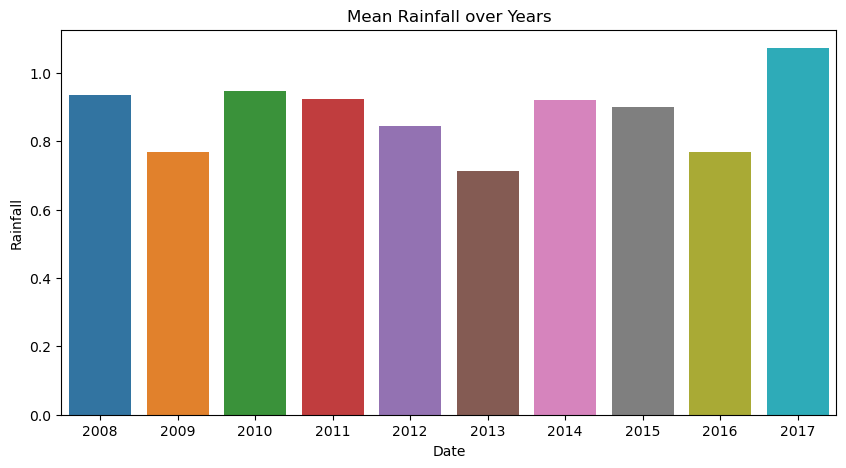

In [30]:
# Convert the 'Date' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the DataFrame by year and calculate the mean rainfall for each year
mean_rainfall_by_year = df.groupby(df['Date'].dt.year)['Rainfall'].mean()

# Create a figure and set its size
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_rainfall_by_year.index, y=mean_rainfall_by_year)
plt.title("Mean Rainfall over Years")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Mean MinTemp over Years')

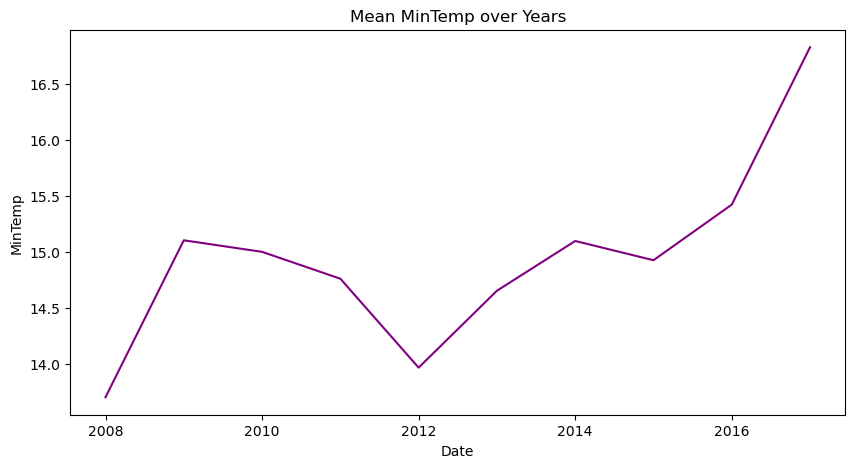

In [31]:
# Convert the 'Date' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the DataFrame by year and calculate the mean minimum temperature for each year
MinTemp_year = df.groupby(df['Date'].dt.year)['MinTemp'].mean()

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches((10, 5))

# Create a line plot using Seaborn
# x = MinTemp_year.index: Years
# y = MinTemp_year: Mean minimum temperature values for each year
# palette = sns.color_palette("Paired"): Color palette for the line
sns.lineplot(x=MinTemp_year.index, y=MinTemp_year, color='purple').set_title("Mean MinTemp over Years")


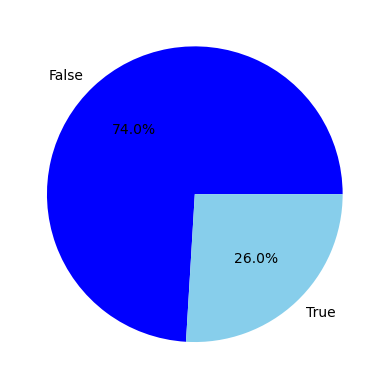

In [37]:
# Create a pie chart using matplotlib
plt.pie(df['RainToday_Yes'].value_counts().values,
        labels = df['RainToday_Yes'].value_counts().index,
        autopct='%1.1f%%',
        colors=['blue', 'skyblue'])
plt.show()

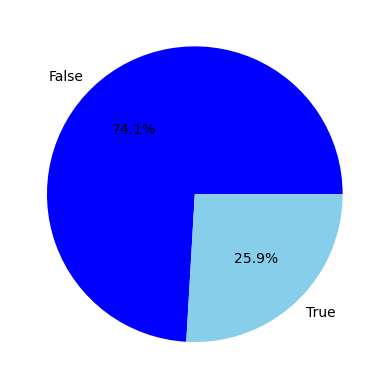

In [36]:
# Create a pie chart using matplotlib with purple color
plt.pie(df['RainTomorrow_Yes'].value_counts().values,
        labels=df['RainTomorrow_Yes'].value_counts().index,
        autopct='%1.1f%%',
        colors=['blue', 'skyblue'])
plt.show()


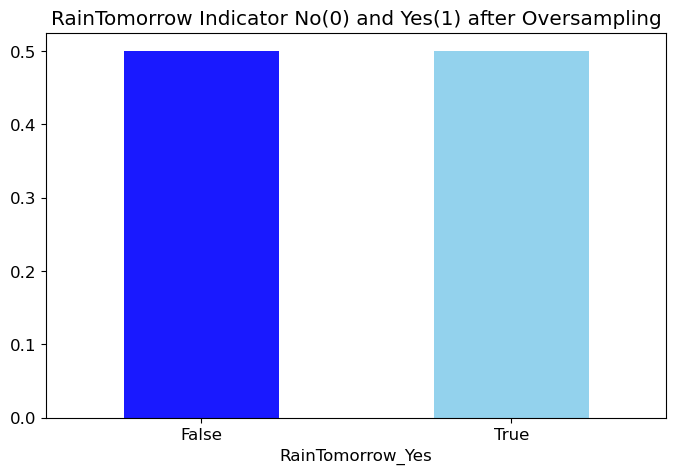

In [116]:
from sklearn.utils import resample

# Define custom colors for the plot
colors = ['blue', 'skyblue']

# Separate data into 'No' and 'Yes' classes for 'RainTomorrow_Yes'
no = df[df.RainTomorrow_Yes == 0]
yes = df[df.RainTomorrow_Yes == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)

# Combine the oversampled 'Yes' class with the 'No' class
df = pd.concat([no, yes_oversampled])

# Create a bar plot to visualize the distribution of 'RainTomorrow_Yes' classes after oversampling
fig = plt.figure(figsize=(8, 5))
df.RainTomorrow_Yes.value_counts(normalize=True).plot(kind='bar', color=colors, alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling')
plt.show()



# 3.Feature Selection
### Splitting X and Y variables

In [39]:
X = df.drop(['RainTomorrow_Yes', 'Date'], axis=1)

In [40]:
Y = df[['RainTomorrow_Yes']]

In [41]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
9,14.6,24.2,3.4999,4.4,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,True
10,16.4,23.9,0.0000,6.4,8.0,78.0,53.0,1017.6,1015.3,7.0,8.0,18.9,23.7,False
13,16.9,24.3,3.0000,3.2,8.7,81.0,51.0,1017.2,1016.5,7.0,1.0,18.4,23.3,True
14,18.3,24.4,0.0000,6.2,8.5,80.0,56.0,1020.2,1018.9,7.0,3.0,19.5,23.8,False
15,16.7,24.1,0.0000,6.2,8.8,77.0,52.0,1023.0,1022.6,7.0,6.0,19.8,23.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,10.0,16.7,3.4999,2.4,0.2,93.0,90.0,1016.3,1014.8,8.0,6.0,10.6,13.8,True
122,14.3,17.6,3.4999,1.8,0.1,97.0,90.0,1027.3,1024.8,8.0,7.0,15.3,17.1,True
2983,12.9,17.2,3.4999,6.4,1.6,85.0,86.0,1015.4,1016.5,7.0,7.0,14.9,14.6,True
2996,16.5,16.9,3.4999,2.4,0.0,91.0,90.0,1019.7,1018.4,8.0,8.0,16.7,16.2,True


In [42]:
Y

,RainTomorrow_Yes
9,False
10,False
13,False
14,False
15,False
...,...
1879,True
122,True
2983,True
2996,True


In [43]:
#Feature scaling
# Standardize the feature matrix X using StandardScaler\
sc = StandardScaler()
X = sc.fit_transform(X)


In [44]:
X

array([[-0.1035885 ,  0.34707476,  1.54083384, ..., -0.12549809,
         0.506429  ,  1.39512176],
       [ 0.29914488,  0.28039411, -0.74918406, ...,  0.2290877 ,
         0.59891515, -0.71678332],
       [ 0.41101527,  0.36930164,  1.21374451, ...,  0.12479776,
         0.506429  ,  1.39512176],
       ...,
       [-0.4839478 , -1.2088071 ,  1.54083384, ..., -0.60523182,
        -1.5051447 ,  1.39512176],
       [ 0.32151896, -1.27548775,  1.54083384, ..., -0.22978803,
        -1.13520011,  1.39512176],
       [ 1.12698573,  0.54711671,  1.54083384, ...,  0.7505374 ,
         0.7607659 ,  1.39512176]])

# 4.Model Training

In [45]:
#Splitting Dataset into Training set and Testing set Dividing the Training and Testing Data in 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Shape of Y_test:", Y_test.shape)
print("Shape of X_train:", X_train.shape)

Shape of Y_test: (989, 1)
Shape of X_train: (3955, 14)


## 1.LOGISTIC REGRESSION


In [46]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model with random_state=0 for reproducibility
cl_lr = LogisticRegression(random_state=0)

# Fit the logistic regression model to the training data
cl_lr.fit(X_train, Y_train)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [47]:
# Use the predict method of the logistic regression model to make predictions on the test data X_test
y_pred_lr = cl_lr.predict(X_test)


In [48]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

# Calculate the accuracy score by comparing the true labels Y_test with the predicted labels y_pred_lr
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
precision_score_lr = precision_score(Y_test, y_pred_lr)
recall_score_lr = recall_score(Y_test, y_pred_lr)

# Print the evaluation metrics
print("Accuracy score for logistic regression:", accuracy_lr)
print("Precision score for logistic regression:", precision_score_lr)
print("Recall score for logistic regression:", recall_score_lr)


Accuracy score for logistic regression: 0.7745197168857432
Precision score for logistic regression: 0.7796257796257796
Recall score for logistic regression: 0.7621951219512195


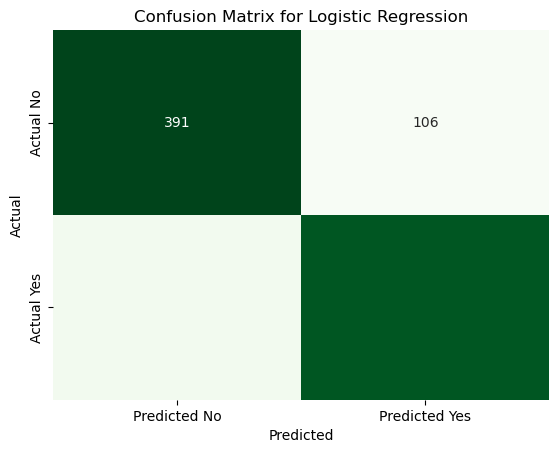

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cl_lr = confusion_matrix(Y_test, y_pred_lr)

# Create a heatmap for the confusion matrix
sns.heatmap(cl_lr, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


Receiver_operating_characteristics_score: 0.7744577219414045


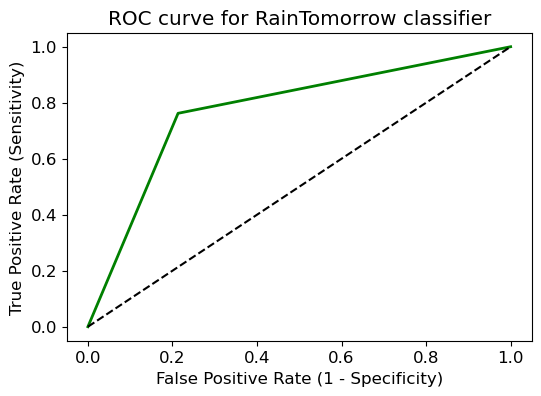

In [57]:
# plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve
# Print ROC score
roc_auc = roc_auc_score(Y_test, y_pred_lr)
print("Receiver_operating_characteristics_score:",roc_auc)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_lr, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## 2.Linear Discriminant Analysis

In [58]:
# Import the LinearDiscriminantAnalysis class from scikit-learn.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [59]:
# Create an instance of the Linear Discriminant Analysis (LDA) classifier
clf_lda = LinearDiscriminantAnalysis()

In [60]:
# Fit the LDA classifier to the training data
clf_lda.fit(X_train, Y_train)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [61]:
# Make predictions on new data (X_test)
y_pred_lda = clf_lda.predict(X_test)

In [62]:
# Model Evaluation 
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate the accuracy score by comparing the true labels Y_test with the predicted labels y_pred_lda
accuracy_lda = accuracy_score(Y_test, y_pred_lda)
precision_lda = precision_score(Y_test, y_pred_lda)
recall_lda = recall_score(Y_test, y_pred_lda)

print("Accuracy score for LDA:", accuracy_lda)
print("Precision score for LDA:", precision_lda)
print("Recall score for LDA:", recall_lda)


Accuracy score for LDA: 0.775530839231547
Precision score for LDA: 0.7848101265822784
Recall score for LDA: 0.7560975609756098


<Axes: >

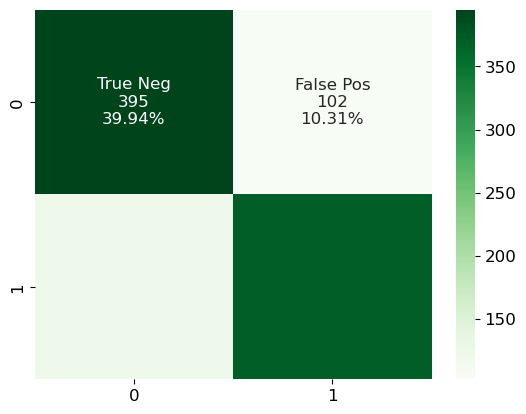

In [63]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
clf_lda = confusion_matrix(Y_test, y_pred_lda)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_lda.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_lda.flatten()/np.sum(clf_lda)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_lda, annot=labels, fmt="", cmap='Greens')

Receiver_operating_characteristics_score: 0.7754330863228149


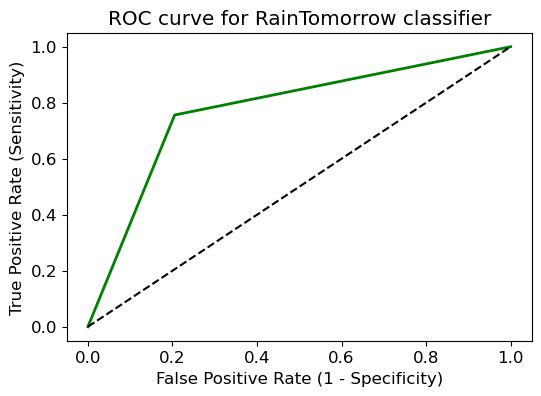

In [64]:
# plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve

#Print ROC score
roc_auc_lda = roc_auc_score(Y_test, y_pred_lda)
print("Receiver_operating_characteristics_score:",roc_auc_lda)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_lda, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## 3.K_Nearest_Neighbors(KNN)

In [66]:
from sklearn import preprocessing
# Create an instance of the StandardScaler and fit it to the training data X_train
scaler = preprocessing.StandardScaler().fit(X_train)
# Use the transform method of the scaler to standardize the training data X_train
X_train_s = scaler.transform(X_train)

In [67]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of the K-Nearest Neighbors (KNN) classifier with n_neighbors=1
clf_knn_1 = KNeighborsClassifier(n_neighbors = 1)
# Fit the KNN classifier to the training data
clf_knn_1.fit(X_train_s,Y_train)
# Make predictions on new data (X_test)
y_pred_knn = clf_knn_1.predict(X_test_s)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [69]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Print performance metrics
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
precision_knn = precision_score(Y_test, y_pred_knn)  # Use a different variable name
recall_knn = recall_score(Y_test, y_pred_knn)  # Use a different variable name
print("Accuracy score for KNN:", accuracy_knn)
print("Precision score for KNN:", precision_knn)
print("Recall score for KNN:", recall_knn)


Accuracy score for KNN: 0.8968655207280081
Precision score for KNN: 0.8584558823529411
Recall score for KNN: 0.9491869918699187


<Axes: >

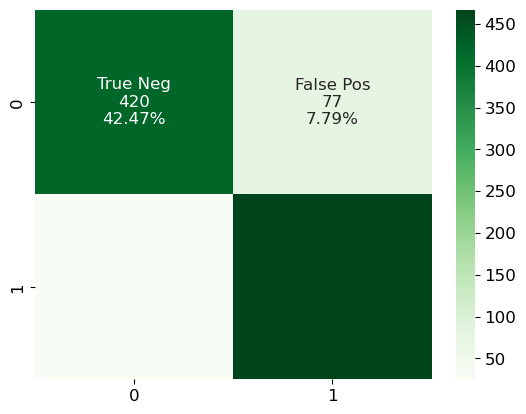

In [70]:
# Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_knn = confusion_matrix(Y_test, y_pred_knn)  # Use a different variable name

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion_knn.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in confusion_knn.flatten() / np.sum(confusion_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(confusion_knn, annot=labels, fmt="", cmap='Greens')

Receiver_operating_characteristics_score: 0.897128707202565


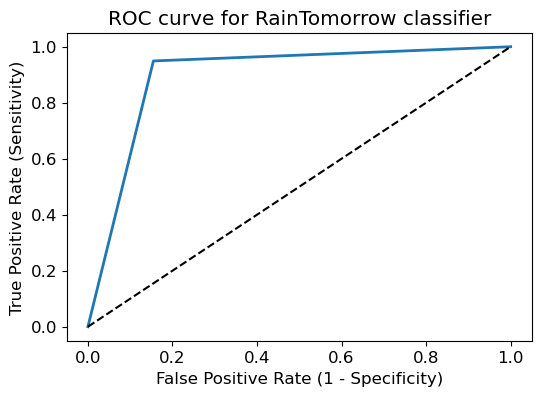

In [71]:
# plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve


roc_auc_knn = roc_auc_score(Y_test, y_pred_knn)
print("Receiver_operating_characteristics_score:",roc_auc_knn)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_knn, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## 4.Random Forest Classifier

In [72]:
# Standardize the training data using the StandardScaler
from sklearn import preprocessing

# Create an instance of the StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)# Fit the scaler to the training data X_train to compute mean and standard deviation

# Apply the standardization transformation to the training data, resulting in X_train_s
X_train_s = scaler.transform(X_train)


In [73]:
# Standardize the test data using the StandardScaler

# Create an instance of the StandardScaler
scaler = preprocessing.StandardScaler().fit(X_test)# Fit the scaler to the test data X_test using the parameters learned from X_train

# Apply the standardization transformation to the test data, resulting in X_test_s
X_test_s = scaler.transform(X_test)


In [74]:
from sklearn.ensemble import  RandomForestClassifier
# Create an instance of the RandomForestClassifier with 100 estimators and a random seed for reproducibility
clf_rfs = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the RandomForestClassifier to the standardized training data
clf_rfs.fit(X_train_s, Y_train)


/var/folders/c1/q0tlzkyn2llg_k4wwrx7_9qh0000gn/T/ipykernel_1148/2850515753.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rfs.fit(X_train_s, Y_train)


RandomForestClassifier(random_state=0)

In [75]:
# Make predictions on new data (X_test) using the RandomForestClassifier (clf_rfs)
y_pred_rfs = clf_rfs.predict(X_test)


In [76]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate and print the accuracy score
accuracy_rfs = accuracy_score(Y_test, y_pred_rfs)
print("Accuracy score for Random Forest Classifier:", accuracy_rfs)

# Calculate and print the precision score
precision_rfs = precision_score(Y_test, y_pred_rfs)
print("Precision score for Random Forest Classifier:", precision_rfs)

# Calculate and print the recall score
recall_rfs = recall_score(Y_test, y_pred_rfs)
print("Recall score for Random Forest Classifier:", recall_rfs)


Accuracy score for Random Forest Classifier: 0.9241658240647118
Precision score for Random Forest Classifier: 0.9001919385796545
Recall score for Random Forest Classifier: 0.9532520325203252


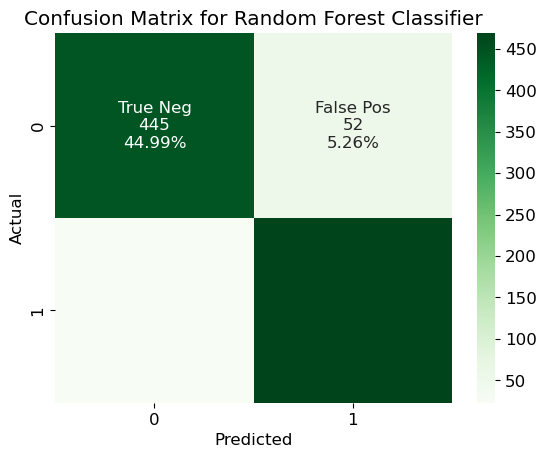

In [78]:
confusion_matrix_rf = confusion_matrix(Y_test, y_pred_rfs)

# Define labels for different parts of the confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

# Convert the counts in the confusion matrix to string format
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_rf.flatten()]

# Calculate the percentages of each part of the confusion matrix relative to the total
group_percentages = ['{0:.2%}'.format(value) for value in confusion_matrix_rf.flatten()/np.sum(confusion_matrix_rf)]

# Combine labels, counts, and percentages to create labels for the heatmap
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Reshape labels into a 2x2 matrix to match the confusion matrix dimensions
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap of the confusion matrix with annotated labels
sns.heatmap(confusion_matrix_rf, annot=labels, fmt="", cmap='Greens')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


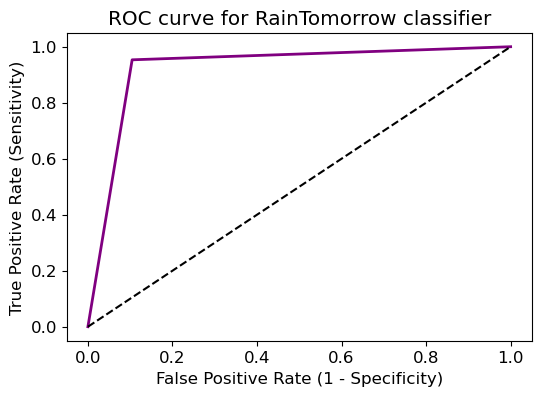

Receiver Operating Characteristics (ROC) Score: 0.9243121329603637


In [79]:
# Import necessary libraries
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(Y_test, y_pred):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred, drop_intermediate=False)

    # Calculate the ROC AUC score
    roc_auc = roc_auc_score(Y_test, y_pred)
    
    # Create a figure for the ROC curve
    plt.figure(figsize=(6, 4))

    # Plot the ROC curve with a purple color
    plt.plot(fpr, tpr, linewidth=2, color='purple')

    # Plot a diagonal line for reference
    plt.plot([0, 1], [0, 1], 'k--')

    # Set the font size for labels
    plt.rcParams['font.size'] = 12

    # Set labels and title
    plt.title('ROC curve for RainTomorrow classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')

    # Show the ROC curve plot
    plt.show()
    
    # Return the ROC AUC score
    return roc_auc

# Plot the ROC curve with a purple color and get the ROC AUC score
roc_auc_rfs = plot_roc_curve(Y_test, y_pred_rfs)
print("Receiver Operating Characteristics (ROC) Score:", roc_auc_rfs)



## 5.Grid Search (Hyperparameter tuning)

In [80]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning
# Create a Random Forest classifier
rf = RandomForestClassifier()  # Initialize a Random Forest classifier object


In [81]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],           
    'max_depth': [None, 10, 20],             
    'min_samples_split': [2, 5, 10]         
}


In [82]:
# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [83]:
best_rf_model = grid_search.best_estimator_

In [84]:
y_pred_best_rf = grid_search.predict(X_test)

In [85]:
# Calculate the accuracy of the best model on the test data
accuracy = best_rf_model.score(X_test, Y_test)
# Calculate the precision of the best model on the test data
precision = precision_score(Y_test, y_pred_best_rf)
# 'precision_score(Y_test, y_pred_best_rf)' computes the precision of the model's predictions
# Calculate the recall of the best model on the test data
recall = recall_score(Y_test, y_pred_best_rf)
# 'recall_score(Y_test, y_pred_best_rf)' computes the recall of the model's predictions

# Print the evaluation metrics
print("Best Model Accuracy:", accuracy)
print("Best Model Precision:", precision)
print("Best Model Recall:", recall)


Best Model Accuracy: 0.923154701718908
Best Model Precision: 0.8984674329501916
Best Model Recall: 0.9532520325203252


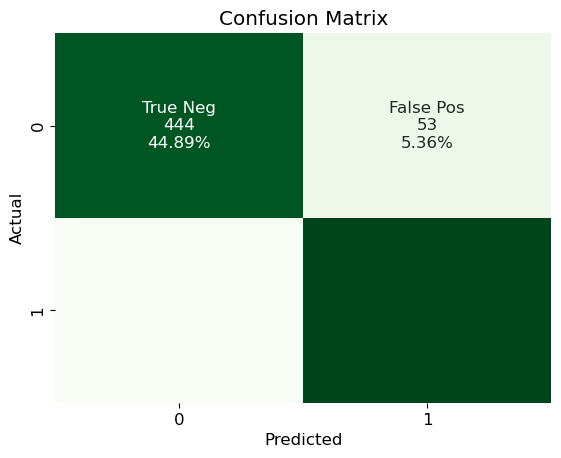

In [87]:

# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create the confusion matrix
confusion = confusion_matrix(Y_test, y_pred_best_rf)

# Define labels for the confusion matrix
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in confusion.flatten()]
group_percentages = [f'{value:.2%}' for value in confusion.flatten() / np.sum(confusion)]

# Create labels for each cell in the confusion matrix
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap to visualize the confusion matrix
sns.heatmap(confusion, annot=labels, fmt='', cmap='Greens', cbar=False)

# Add labels and title to the heatmap
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

Receiver Operating Characteristics (ROC) Score: 0.92330609674306


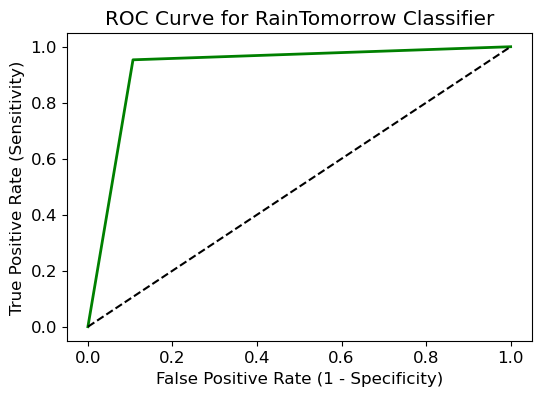

In [89]:
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_best_rf, drop_intermediate=False)

# Calculate ROC AUC score
roc_auc_best_rf = roc_auc_score(Y_test, y_pred_best_rf)
print("Receiver Operating Characteristics (ROC) Score:", roc_auc_best_rf)

# Create a plot for the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance

# Set plot labels and title
plt.title('ROC Curve for RainTomorrow Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

# Show the ROC curve plot
plt.show()


## 6.XG Boost Classifier

In [91]:
# Import necessary libraries
import xgboost as xgb  # Import the xgboost library
from sklearn.metrics import accuracy_score  # Import the accuracy_score metric from sklearn

In [92]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [94]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create an XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,      
    max_depth=3,           # Maximum depth of each tree
    min_child_weight=1,    # Minimum sum of instance weight (Hessian) needed in a child
    gamma=0,               # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,         # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    objective='binary:logistic',  # Binary classification
    nthread=-1,            # Number of parallel threads
    seed=42                # Random seed for reproducibility
)

# Training the XGBoost Classifier
xgb_clf.fit(X_train, Y_train)

# Making predictions on new data (X_test)
y_pred_xgb = xgb_clf.predict(X_test)

# Calculate accuracy
accuracy_xgb  = accuracy_score(Y_test, y_pred_xgb)
print("Accuracy:", accuracy)


Accuracy: 0.923154701718908


## 7.Decision Trees

In [95]:
# Import the DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier  

# Create a Decision Tree Classifier with specified criterion and random state
clf_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  

# Fit the Decision Tree classifier to the training set
clf_dt.fit(X_train, Y_train) 


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [96]:
y_pred_dt = clf_dt.predict(X_test)


In [97]:
# Print the model performance metrics
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
precision_dt = precision_score(Y_test, y_pred_dt)
recall_dt = recall_score(Y_test, y_pred_dt)

print("Accuracy score for Decision Tree:", accuracy_dt)
print("Precision score for Decision Tree:", precision_dt)
print("Recall score for Decision Tree:", recall_dt)

Accuracy score for Decision Tree: 0.9039433771486349
Precision score for Decision Tree: 0.8642201834862385
Recall score for Decision Tree: 0.9573170731707317


<Axes: >

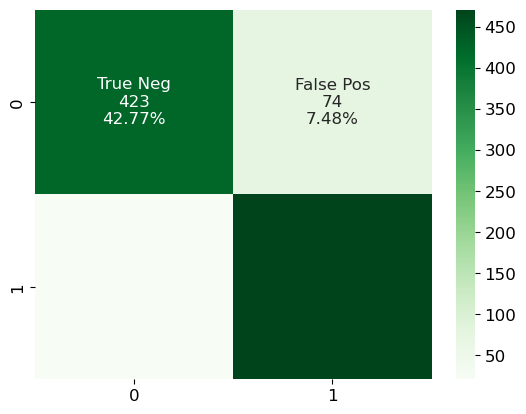

In [99]:
# Calculate the confusion matrix
clf_dt = confusion_matrix(Y_test, y_pred_dt)

# Define labels for the confusion matrix
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Calculate counts, percentages, and labels for the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in clf_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in clf_dt.flatten() / np.sum(clf_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Reshape labels for display
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap of the confusion matrix
sns.heatmap(clf_dt, annot=labels, fmt="", cmap='Greens')


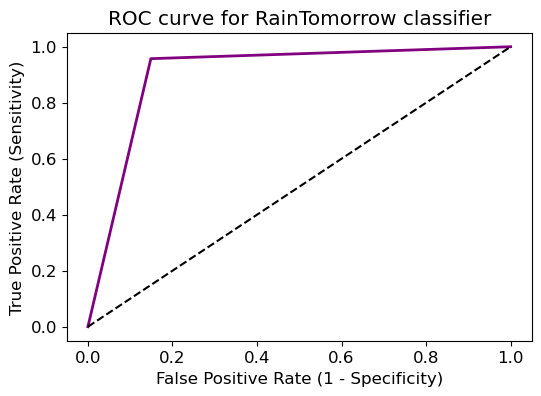

Receiver Operating Characteristics (ROC) Score: 0.904211856504883


In [100]:
# Print ROC curve and ROC score for Decision Tree classifier

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_dt, drop_intermediate=False)
roc_auc_dt = roc_auc_score(Y_test, y_pred_dt)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='purple')  # Set the line color to purple
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal reference line
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Print the ROC AUC score
print("Receiver Operating Characteristics (ROC) Score:", roc_auc_dt)

## 8.Naive Bayes

In [102]:
# Fitting the Naive Bayes model for train data

# Import the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
clf_nb = GaussianNB()

# Fit the classifier to the training data
clf_nb.fit(X_train, Y_train)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [103]:
y_pred_nb = clf_nb.predict(X_test)


In [104]:
# Calculate and print the performance metrics for model evaluation

# Calculate the accuracy score for the Naive Bayes classifier
accuracy_nb = accuracy_score(Y_test, y_pred_nb)

# Calculate the precision score for the Naive Bayes classifier
precision_nb = precision_score(Y_test, y_pred_nb)

# Calculate the recall score for the Naive Bayes classifier
recall_nb = recall_score(Y_test, y_pred_nb)

# Print the accuracy score
print("Accuracy score for Naive Bayes:", accuracy_nb)

# Print the precision score
print("Precision score for Naive Bayes:", precision_nb)

# Print the recall score
print("Recall score for Naive Bayes:", recall_nb)


Accuracy score for Naive Bayes: 0.7603640040444893
Precision score for Naive Bayes: 0.7661795407098121
Recall score for Naive Bayes: 0.7459349593495935


<Axes: >

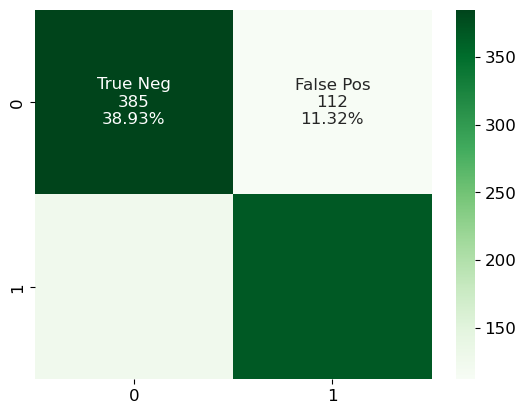

In [105]:
# Print the confusion matrix for the Naive Bayes classifier

# Calculate the confusion matrix
clf_nb = confusion_matrix(Y_test, y_pred_nb)

# Define group names for the four confusion matrix values
group_names = ['True Neg','False Pos','False Neg','True Pos']

# Calculate the counts for each value in the confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in clf_nb.flatten()]

# Calculate the percentages for each value in the confusion matrix
group_percentages = ['{0:.2%}'.format(value) for value in clf_nb.flatten() / np.sum(clf_nb)]

# Create labels for each cell in the confusion matrix, combining counts and percentages
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Reshape the labels into a 2x2 matrix to match the confusion matrix shape
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap of the confusion matrix with annotated labels
sns.heatmap(clf_nb, annot=labels, fmt="", cmap='Greens')


Receiver_operating_characteristics_score: 0.7602914233367687


/var/folders/c1/q0tlzkyn2llg_k4wwrx7_9qh0000gn/T/ipykernel_1148/917928510.py:12: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr = interp(mean_fpr, fpr, tpr)


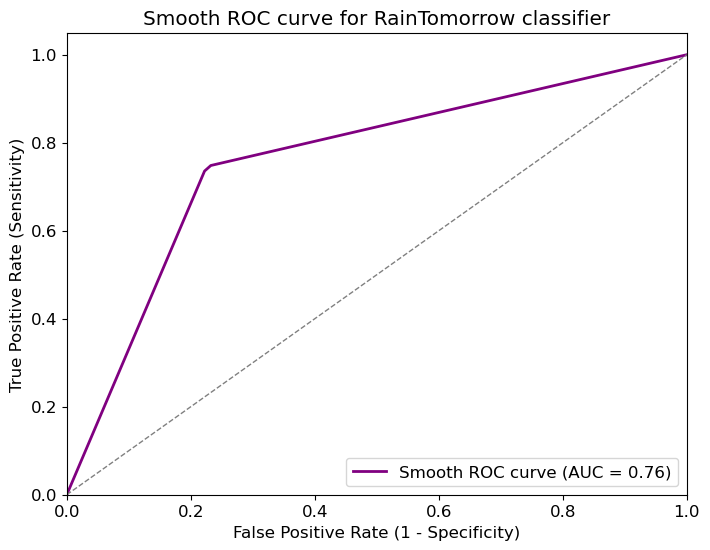

In [106]:
# Import necessary libraries
from scipy import interp
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_nb)

# Create mean false positive rate values for interpolation
mean_fpr = np.linspace(0, 1, 100)

# Interpolate the true positive rate values to get a smooth ROC curve
mean_tpr = interp(mean_fpr, fpr, tpr)

# Calculate the ROC AUC score
roc_auc_rfs = roc_auc_score(Y_test, y_pred_nb)

# Print the ROC AUC score
print("Receiver_operating_characteristics_score:", roc_auc_rfs)

# Create a figure for the ROC curve
plt.figure(figsize=(8, 6))

# Plot the smooth ROC curve with the AUC score in the label
plt.plot(mean_fpr, mean_tpr,  color='purple', lw=2, label='Smooth ROC curve (AUC = {:.2f})'.format(roc_auc_rfs))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Smooth ROC curve for RainTomorrow classifier')
plt.legend(loc='lower right')
plt.show()


# 5. Model Selection

In [108]:
# Create a dictionary containing the accuracy scores of different models
accuracy_dict = {"Logistic Regression": accuracy_lr,
                 "LDA": accuracy_lda,
                 "KNN": accuracy_knn,
                 "Random Forest": accuracy_rfs,
                 "Random Forest with grid search": accuracy,  
                 "XGB": accuracy_xgb,
                 "Decision Trees": accuracy_dt,
                 "Naive Bayes": accuracy_nb}

# Create a pandas DataFrame from the accuracy_dict with "Accuracy" as the column name
accuracy_df = pd.DataFrame(pd.Series(accuracy_dict, index=accuracy_dict.keys()), columns=["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.774520
LDA,0.775531
KNN,0.896866
Random Forest,0.924166
Random Forest with grid search,0.923155
XGB,0.806876
Decision Trees,0.903943
Naive Bayes,0.760364


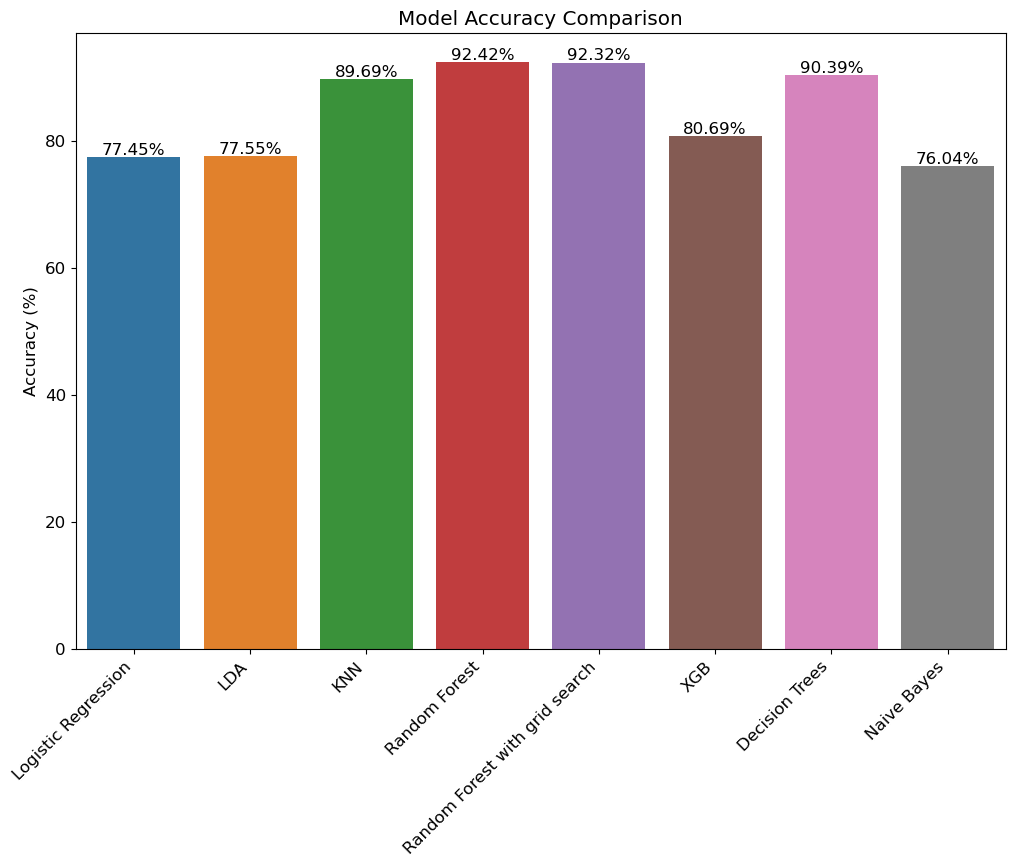

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create Visualization for different model trained accuracy for comparison
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=accuracy_df.index, y=accuracy_df.Accuracy * 100)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add y-axis label and title
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Add accuracy values on top of each bar
for i, val in enumerate(accuracy_df.Accuracy):
    y = round(val * 100, 2)
    ax.text(i, val * 100, f'{y}%', ha="center", va="bottom", fontsize=12)

plt.show()

# 6. Best Model rainfall prediction 

In [110]:
import pandas as pd
import pickle

In [117]:
# Define the weather data for two days
Weather_Data = [
    [14.6, 16.4, 15.6, 6.2, 0.0, 92, 84, 1017.6, 1017.4, 8, 8, 20.7, 20.9, 1],  # Day 1 data
    [16.73, 25.83, 93.01, 8.21, 0.01, 71, 65, 1019.74, 1011.19, 1, 1, 18.77, 17.76, 1]  # Day 2 data
]

# Make predictions using the best random forest model
predictions = best_rf_model.predict(Weather_Data)

# Interpret predictions
results = ["It will rain tomorrow" if pred == 1 else "It wont rain tomorrow" for pred in predictions]

# Print results for each day
for i, result in enumerate(results):
    print(f"Day {i+1}: {result}")



Day 1: It will rain tomorrow
Day 2: It will rain tomorrow


# 1. Your views about the problem statement?

The problem we're tackling here is a big one: predicting rainfall in Sydney using historical weather data. It might not sound like a big deal, but accurate weather forecasts are super important for things like farming, managing disasters, and even planning our daily activities. The problem is, weather systems are pretty unpredictable and wild, so we need some robust machine learning models that can handle all that chaos and still make accurate predictions. On top of that, we've got to deal with missing data and make sure our model is accurate. It's a challenging task, but if we can pull it off, we'll be making a real difference in how we predict and prepare for weather events.

# 2. What will be your approach to solving this task?

### Approach to Solving the Rainfall Prediction Task
#### Data Ingestion and Exploration:

- Load the dataset using pandas.
- Conduct an initial exploration to understand the dataset's structure, size, and content.
- Check for missing values and data inconsistencies to identify potential issues early on.

#### Data Preprocessing:
- Handle any missing or erroneous data points.
- Encode categorical variables appropriately if present.
- Perform feature scaling or normalization to ensure uniformity across feature scales.

#### Feature Selection:
- Analyze the relationships and correlations between different features.
- Identify and select the most relevant features that significantly contribute to predicting rainfall.

#### Model Training:
- Train various classification models, such as Decision Trees, Random Forests, and Gradient Boosting, on the preprocessed dataset.
- Use the training data to fit these models.
- Model Selection for Best Accuracy:

#### Evaluate each model's performance using metrics like accuracy, precision, recall, and F1-score.
- Select the model that demonstrates the highest predictive accuracy for rainfall.
- Final Rainfall Prediction:

#### Use the chosen model to make rainfall predictions.
- Output predictions for future rainfall based on the selected model.
- This approach systematically addresses the task of rainfall prediction, focusing on data preparation, model training, evaluation, and selection to achieve the highest accuracy.


# 3.What were the available ML model options you had to perform this task?

The machine learning models considered for predicting rainfall in Sydney include:

#### Logistic Regression
- A statistical model that uses a logistic function to model a binary dependent variable. It's simple and interpretable, often used as a baseline for classification tasks.

#### Linear Discriminant Analysis (LDA)
- A classification method that projects features into a lower-dimensional space to maximize class separability. It assumes normally distributed classes with equal covariance matrices.

#### K-Nearest Neighbors (KNN)
- A non-parametric model that classifies instances based on the majority class among the k-nearest neighbors in the feature space. It's simple but can be computationally intensive.

#### Decision Trees
- A tree-structured model that splits the data based on feature values to make decisions. It's easy to interpret and visualize but can be prone to overfitting.

#### Random Forest (an Ensemble method)
- An ensemble method that builds multiple decision trees and merges their results to improve accuracy and control overfitting. It uses bootstrapping and feature randomness.

#### Gradient Boosting (another Ensemble method)
- An ensemble technique that builds trees sequentially, each one correcting errors from the previous tree. It combines multiple weak learners to form a strong learner.

#### Naive Bayes
- A probabilistic classifier based on Bayes' theorem with strong independence assumptions between features. It's simple and fast, often used for text classification.

#### Support Vector Machines (SVM)
- A classifier that finds the optimal hyperplane to separate classes by maximizing the margin between them. Effective in high-dimensional spaces and for cases with clear margin separation.

### Model Performance
Here are the accuracy scores for each model:

- Logistic Regression: 0.774520
- LDA: 0.775531
- KNN: 0.896866
- Decision Trees: 0.903943
- Random Forest: 0.924166
- Random Forest with grid search: 0.923155
- XGBoost (XGB): 0.806876
- Naive Bayes: 0.760364

Among these, the Random Forest model achieved the highest accuracy score of 0.924166, making it the best choice for predicting rainfall in Sydney.

# 4.Which model’s performance is best and what could be the possible reason for that?

#### The Random Forest model achieved the highest accuracy score of 0.924166, making it the best performing model for predicting rainfall in Sydney.

### Possible Reasons for Its Superior Performance:

- Ensemble Method: Random Forest is an ensemble method that combines multiple decision trees, which helps to reduce the variance and prevent overfitting, leading to better generalization on unseen data.

- Bagging: It uses bootstrap aggregating (bagging) to create multiple subsets of the data and train each decision tree on a different subset. This enhances the robustness and stability of the model by minimizing the impact of noise and anomalies in the data.

- Feature Randomness: During the training of each tree, Random Forest selects a random subset of features for splitting, which introduces diversity among the trees. This reduces the likelihood of the model being biased by specific features.

- Handling of Missing Values and Outliers: Random Forest can effectively handle missing values and outliers, which are common in weather datasets. This improves its accuracy compared to models that are more sensitive to data imperfections.

- Non-linearity: Random Forest can capture complex, non-linear relationships between features, which are often present in weather data, leading to better predictive performance compared to linear models like Logistic Regression and LDA.

These characteristics make the Random Forest model well-suited for the task of predicting rainfall, where capturing the intricate patterns and variability in weather data is crucial for accurate predictions.









# 5. What steps can you take to improve this selected model’s performance even further?


### Steps to Improve Random Forest Model Performance

#### Hyperparameter Tuning:
- Use Grid Search, Random Search, or Bayesian Optimization to fine-tune parameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf.

#### Feature Engineering:
- Create interaction features and polynomial features to capture complex relationships.
- Use feature selection techniques like Recursive Feature Elimination (RFE) to prioritize informative features.
  
#### Handling Imbalanced Data:
- Apply resampling techniques such as SMOTE or adjust class weights to handle imbalances in the target variable.

#### Data Augmentation:
- Generate synthetic data points or use bootstrap aggregation to diversify the training set.

#### Model Ensemble:
- Combine predictions from different models (e.g., Gradient Boosting, XGBoost) using stacking or blending methods.

#### Regularization Techniques:
- Implement pruning and explore regularized variants of Random Forests to prevent overfitting.

#### Cross-Validation:
- Use k-fold cross-validation, ensuring stratified folds for better generalization.

#### Advanced Algorithms:
- Experiment with related algorithms like CatBoost or ExtraTrees to leverage potential performance improvements.

#### Feature Importance Analysis:
- Continuously analyze feature importance to refine and optimize the feature set.

#### Increase Data Quality and Quantity:
- Incorporate more historical and relevant external data sources to enrich the feature set.

Implementing these steps systematically can significantly enhance the Random Forest model's performance in predicting rainfall accurately.

# --------------------------------THANK YOU-----------------------------------